#Bibliotecas

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static

# Sobre as Bibliotecas Utilizadas

**NumPy**

A abreviação NumPy significa Numerical Python (Python Númerico), tudo isso devido ao fato de ser baseado nos projetos Numeric e Numarray que foi feito com objetivo de reunir a comunidade em torno de um framework de processamento Arrays. O Numpy ocupa menos memória, é mais rápido (pois é mais próximo a linguagem de baixo nível) e possui mais facilidade de execução de calculos numéricos. (**HARVE**,2022)

**Pandas**

Pandas é a mais popular biblioteca do Python de Data Science.Através do Pandas é possível importar dados armazenados em diversos formatos (na maior parte das vezes em formato csv ou xls), tratar esses dados, transformá-los em um DataFrame e realizar as análises necessárias. (**BRASIL DATA SCIENCE**, 2021)

**Matplotlib**

O Matplotlib é uma biblioteca para a visualização de dados em Python. Ele apresenta uma API orientada a objetos que permite a criação de gráficos em 2D de uma forma simples e com poucos comandos. A ferramenta disponibiliza diversos tipos de gráficos, como em barra, em linha, em pizza, histogramas entre outras opções. A API foi projetada para ser compatível com o MATLAB que, apesar de ser referência na área de processamento numérico, não é opensource. (**KING HOST**, 2018). 

**Seaborn**

Seaborn é uma biblioteca para criar gráficos estatísticos em Python. Isso aumenta matplotlib e se integra estreitamente com Estruturas de dados do Pandas.
Com o Seaborn Design, você pode explorar e entender seus dados rapidamente. O Seaborn captura quadros inteiros de dados ou matrizes que contêm todos os seus dados e executa todas as funções internas necessárias para mapeamento semântico e agregação estatística para transformar dados em gráficos informativos. 
Ele abstrai a complexidade e permite que você projete seus gráficos de acordo com seus requisitos. (**HITECHGLITZ**, 2022).

**Scipy/scipy.stats**

O SciPy é o pacote básico da linguagem Python que implementa diversas técnicas úteis na computação científica. Utiliza como base o NumPy para lidar eficientemente com grandes quantidades de números, e implementa em linguagem C diversos algoritmos numéricos e simbólicos para o processamento matemático. Entre as capacidades do SciPy, temos:

* Estatísticas
* Otimização
* Integração numérica
* Processamento de sinais e imagens
* Solução de equações diferenciais
* Funções especiais (Bessel, etc.)
* Polinômios (**pyscience**, ?).

**Collections counter**

Um Counter é uma subclasse de dict subclass para contagem de objetos hasheáveis. É uma coleção na qual elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário. Contagens podem ser qualquer valor inteiro incluindo zero e contagens negativas. A classe Counter é similar a sacos ou multiconjuntos em outras linguagens.

Os elementos são contados a partir de um iterável iterable ou inicializado a partir de um outro mapeamento mapping (ou contador). (**PYTHON**, ?)




# Ocorrências - Acidentes vs Incidentes

# Formatação de Dados
Método de formatação, para que o número de quantidades apareçam na parte superior da barra.

In [ ]:
def formatar_dados_na_parte_superior_da_barra(retangulos, ax): 
    for retangulo in retangulos:
        altura = retangulo.get_height()
        ax.annotate('{}'.format(altura),
                    xy=(retangulo.get_x() + retangulo.get_width() / 2, altura),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# Leitura de dados

Leitura de arquivo CSV, que atribui para varíavel todos valores contidos no arquivo.

In [ ]:
df_dados = pd.read_csv('/content/ocorrencias_cenipa.csv')

# Separação de Tipos por Região.

Neste bloco, é realizada a separação das 4 regiões por cidade, e os 3 tipos de ocorrência que o gráfico analisará.



In [ ]:
dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
dic_tipos_ocorrencias = ['ACIDENTE', 'INCIDENTE','INCIDENTE GRAVE']
dic_valores_ocorrencias = {i: [ len([k for k in list(df_dados.loc[df_dados['tipo'] == i, ['estado']]['estado'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in dic_tipos_ocorrencias}

dic_valores_ocorrencias['Região'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_valores_ocorrencias)

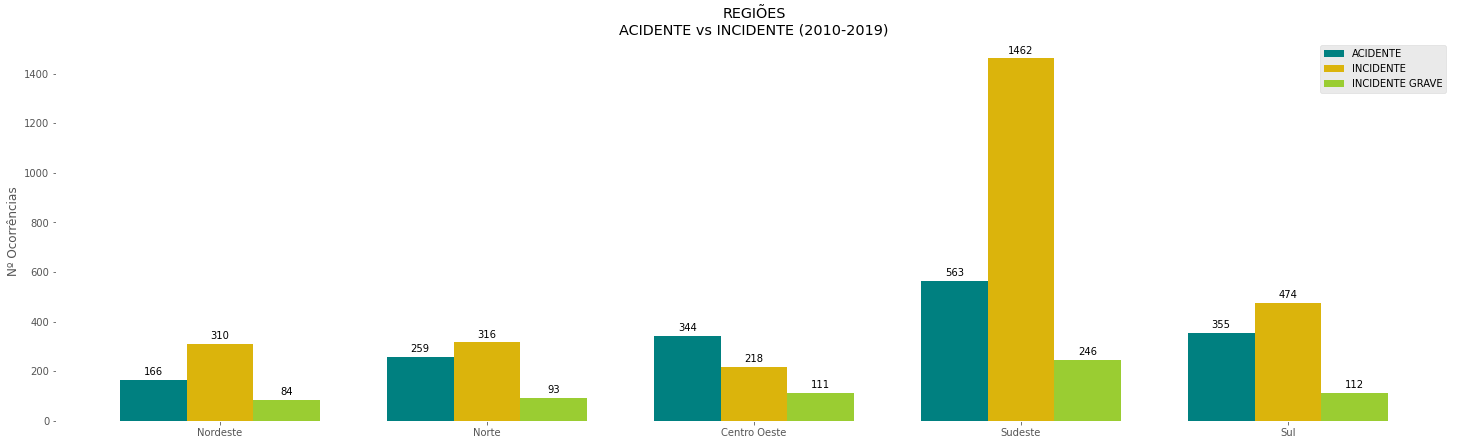

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(25,7)) 

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1]
r3 = [ x + width for x in r2]

retangulo_acidente = ax.bar(r1, dados_regioes['ACIDENTE'], width, label='ACIDENTE',color='#008080')
retangulo_incidente = ax.bar(r2, dados_regioes['INCIDENTE'], width, label='INCIDENTE', color='#DBB40C')
retangulo_incidente_grave = ax.bar(r3, dados_regioes['INCIDENTE GRAVE'], width, label='INCIDENTE GRAVE',color='#9ACD32')
 

ax.set_ylabel('Nº Ocorrências')
ax.set_title('REGIÕES\nACIDENTE vs INCIDENTE (2010-2019)')
ax.set_xticks(r2)
ax.set_xticklabels(dados_regioes['Região'])
ax.set_facecolor(color='white')
ax.legend()


formatar_dados_na_parte_superior_da_barra(retangulo_acidente, ax)
formatar_dados_na_parte_superior_da_barra(retangulo_incidente, ax)
formatar_dados_na_parte_superior_da_barra(retangulo_incidente_grave, ax) 
plt.grid(False)
plt.show() 

O Sudeste concentra 45% das viagens de avião feitas pelos brasileiros, tendo o maior índice de ocorrências e acidentes. O fluxo na região é seguido por Nordeste (21,5%), Sul (14,4%), Centro-Oeste (12%) e Norte (7,1%), tendo o menor índice de ocorrências e acidentes.

# Percentual de Ocorrências por Tipos

Separação de percentual por tipos de incidente e suas quantidades.


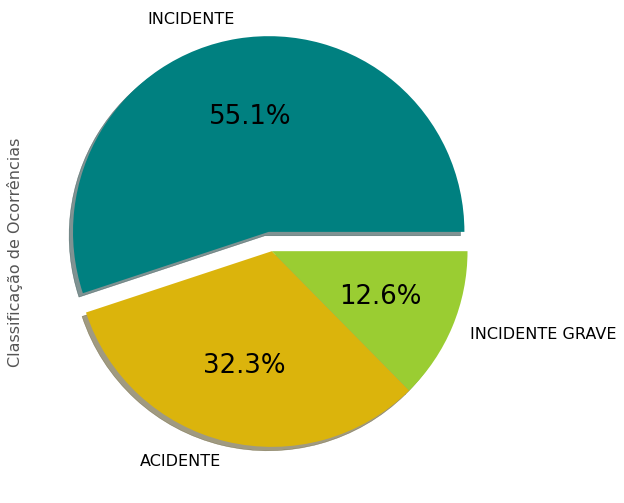

In [ ]:
plt.style.use("ggplot") 
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE + 10)          
plt.rc('axes', titlesize=BIGGER_SIZE)     
plt.rc('axes', labelsize=BIGGER_SIZE)    
plt.rc('xtick', labelsize=BIGGER_SIZE)    
plt.rc('ytick', labelsize=BIGGER_SIZE)    
plt.rc('legend', fontsize=BIGGER_SIZE)     
plt.rc('figure', titlesize=BIGGER_SIZE)  

df_dados['tipo'].value_counts().plot(kind='pie', explode=(0.1, 0, 0),  shadow=True, colors=('#008080','#DBB40C','#9ACD32'), autopct='%1.1f%%' ,label="Classificação de Ocorrências" ,figsize=(9, 9))
plt.show() 

Observamos que os **incidentes**, são os que maior ocorrência, sem gravidade e com **55,1%** do total.

Já os **Incidentes graves** representam **12,6%** e os **acidentes**, **32,3%** do total. O transporte aéreo é o primeiro em se tratando de segurança.

# Ocorrências por tipo de aeronave

Aqui podemos ver melhor em relação a quantidade de ocorrências com determinado 
modelo de aeronave.


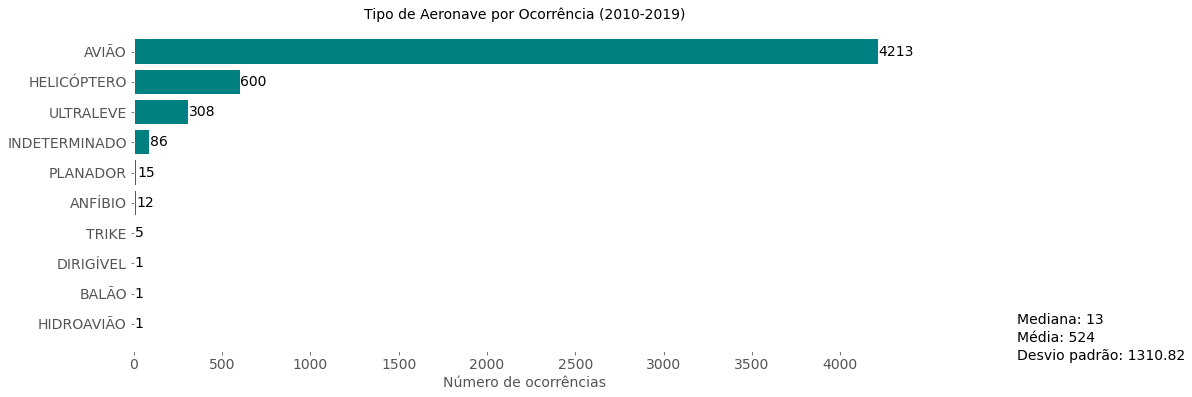

In [ ]:
ct_aeronave_tipo = Counter(df_dados['aeronave_tipo']) 
list_tipo = sorted(ct_aeronave_tipo, key = ct_aeronave_tipo.get, reverse = True) 
list_quantidade_ocorrencias = sorted(list(ct_aeronave_tipo.values()), reverse = True) 

plt.style.use("ggplot")

BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=BIGGER_SIZE-5)     
plt.rc('axes', labelsize=BIGGER_SIZE-5)    
plt.rc('xtick', labelsize=BIGGER_SIZE)    
plt.rc('ytick', labelsize=BIGGER_SIZE)    
plt.rc('legend', fontsize=BIGGER_SIZE)     
plt.rc('figure', titlesize=BIGGER_SIZE)

fig,ax = plt.subplots(figsize=(14, 6))

x=list_tipo
y=list_quantidade_ocorrencias

rects1=ax.barh(x, y,color='#008080')


for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
ax.set_facecolor(color='white')
plt.xlabel("Número de ocorrências", size=BIGGER_SIZE)
plt.title('Tipo de Aeronave por Ocorrência (2010-2019)',size=BIGGER_SIZE) 
# estatísticas do tipo de aeronave por ocorrência
plt.text(5000, 9, 'Mediana: %d'%(np.median(np.array(list_quantidade_ocorrencias))))
plt.text(5000, 9.6, 'Média: %d'%(np.mean(np.array(list_quantidade_ocorrencias))))
plt.text(5000, 10.2, 'Desvio padrão: %.2f'%(static.stdev(list_quantidade_ocorrencias)))

plt.show()

Aviões são maioria em número de ocorrências, pois, o número de aviões que decolam é muito superior que os demais modelos de aéronaves. A média de 524 é muito alta, comparada aos demais modelos.

# Ocorrências por dia, por mês e por ano

Abaixo veremos as ocorrências e seus volumes, em três determinadas frações de tempo, no caso **dia**, **mês** e **ano**.

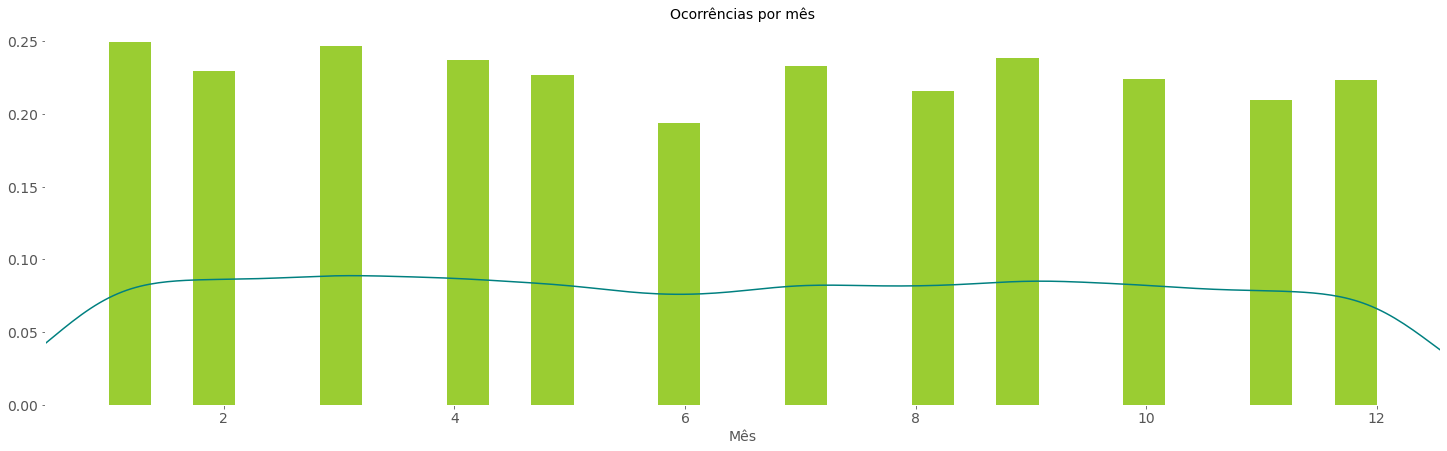

In [ ]:
df_dados['data'] = pd.to_datetime(df_dados['data'])
df_dados['Mes'] = df_dados['data'].map(lambda x: x.month)
df_dados['Dia'] = df_dados['data'].map(lambda x: x.day)
ct_ocorrencias_mes = Counter(df_dados['Mes'])
list_meses = (list(ct_ocorrencias_mes.keys()))
list_ocorrencia_mes = (list(ct_ocorrencias_mes.values()))

plt.style.use("ggplot")
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=BIGGER_SIZE-5)     
plt.rc('axes', labelsize=BIGGER_SIZE-5)    
plt.rc('xtick', labelsize=BIGGER_SIZE)    
plt.rc('ytick', labelsize=BIGGER_SIZE)    
plt.rc('legend', fontsize=BIGGER_SIZE)     
plt.rc('figure', titlesize=BIGGER_SIZE)

fig,ax = plt.subplots(figsize=(25, 7))

x=df_dados.Mes
ax.set_facecolor(color='white')

plt.hist(x, density=True, bins=30,color='#9ACD32')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 309)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF",color="#008080")
plt.xlabel('Mês',size=BIGGER_SIZE)
plt.title('Ocorrências por mês', size=BIGGER_SIZE)

plt.show()

No verão, período de férias escolares e carnaval, aumentam muito o número de voos, com promessas de preços baixos, e facilidades no pagamento, assim sendo, aumenta também o número de ocorrências. 

No gráfico acima, observamos que o mês de maior ocorrência foi em **janeiro**. 
Já o mês de **junho** tem o menor índice de viagens, por ser período de inverno e de dias escolares letivos. Tendo o menor número de ocorrências.

A **média** mensal de ocorrências foi de **436**.

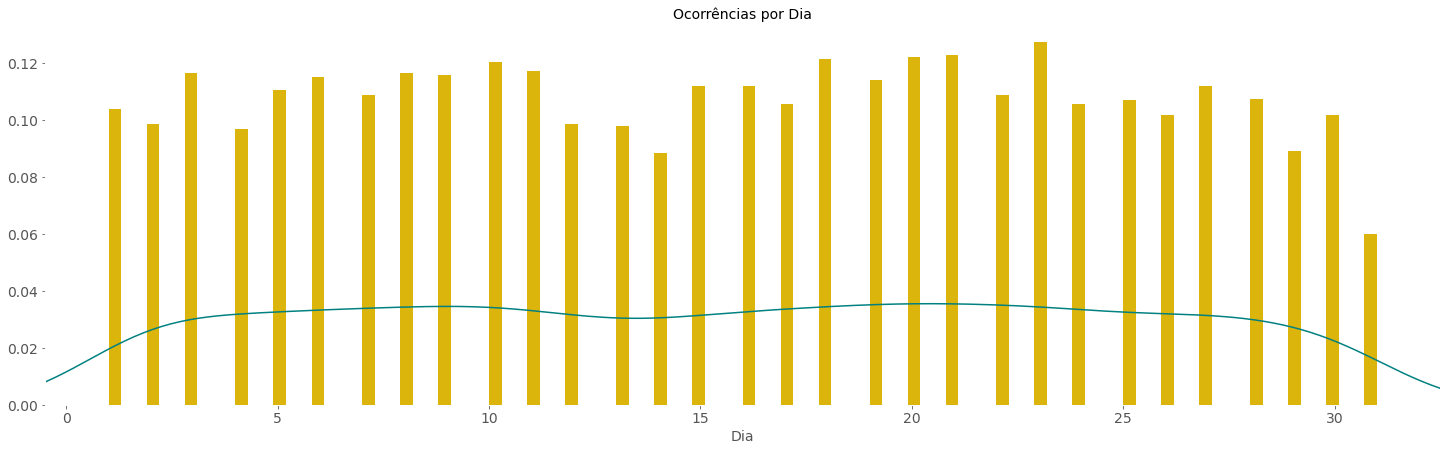

In [ ]:
ct_ocorrencias_por_dia = Counter(df_dados['Dia'])
list_dia = list(ct_ocorrencias_por_dia.keys())
ocorrencia_dia = list(ct_ocorrencias_por_dia.values())
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(25,7))
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=BIGGER_SIZE-5)     
plt.rc('axes', labelsize=BIGGER_SIZE-5)    
plt.rc('xtick', labelsize=BIGGER_SIZE)    
plt.rc('ytick', labelsize=BIGGER_SIZE)    
plt.rc('legend', fontsize=BIGGER_SIZE)     
plt.rc('figure', titlesize=BIGGER_SIZE)
ax.set_facecolor(color='white')
x = df_dados.Dia
plt.hist(df_dados.Dia, density=True, bins= 100,color='#DBB40C')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF",color="#008080")
plt.xlabel('Dia',size=BIGGER_SIZE)
plt.title('Ocorrências por Dia',size=BIGGER_SIZE)

plt.show()

Observamos no gráfico acima, que apresenta uma variável de ocorrências entre os dias 1º e 31º. 

Não havendo um único dia sem ocorrências, a média diária foi de 169.
O **23º** é onde o número de ocorrências mais aconteceu. Já o **31º** foi o dia com menor número de ocorrências no mês.

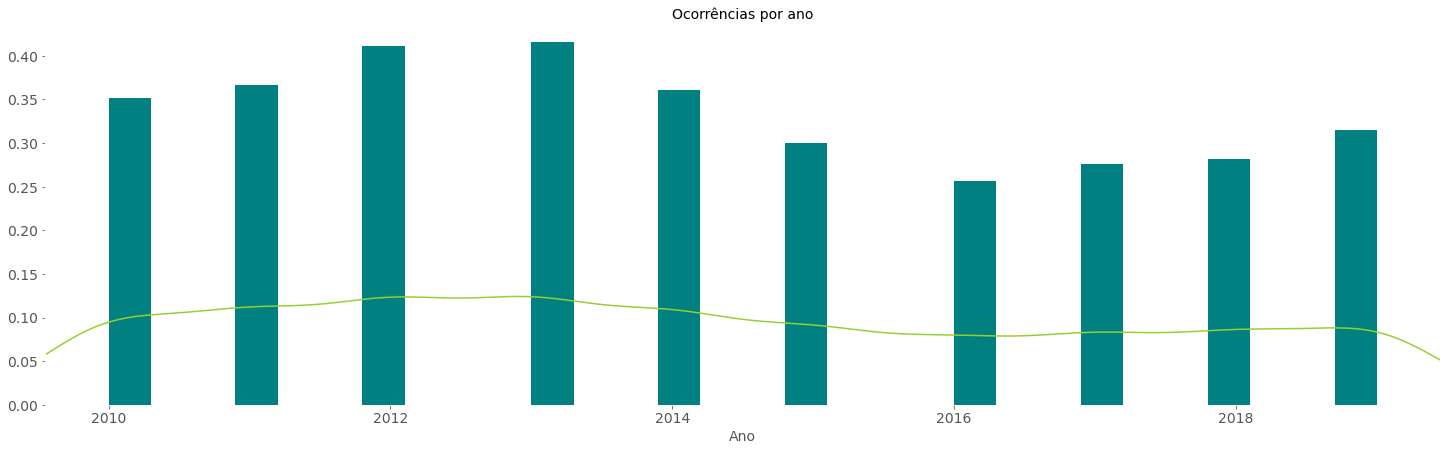

In [ ]:
ct_ocorrencias_ano = Counter(df_dados['ano'])
list_ano = list(ct_ocorrencias_ano.keys())
list_ocorrencia_ano = list(ct_ocorrencias_ano.values())

BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=BIGGER_SIZE-5)     
plt.rc('axes', labelsize=BIGGER_SIZE-5)    
plt.rc('xtick', labelsize=BIGGER_SIZE)    
plt.rc('ytick', labelsize=BIGGER_SIZE)    
plt.rc('legend', fontsize=BIGGER_SIZE)     
plt.rc('figure', titlesize=BIGGER_SIZE)


plt.style.use("ggplot")
ax.set_facecolor(color='white')
fig,ax = plt.subplots(figsize=(25,  7))
x= df_dados.ano
plt.hist(x, density=True, bins= 30,color='#008080')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
ax.set_facecolor(color='white')
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF",color="#9ACD32")
plt.xlabel('Ano',size=BIGGER_SIZE)
plt.title('Ocorrências por ano',size=BIGGER_SIZE)
plt.show()

O ano de **2013 teve o maior número de ocorrências graves.**
O ano de **2016 teve o menor número de ocorrências graves.** 
Com o objetivo de mitigar o risco de ocorrências, o CENIPA atua por meio dos sete Serviços Regionais de Investigação e Prevenção de Acidentes Aeronáuticos (SERIPA), espalhados pelo território brasileiro. Os SERIPA realizam seminários, palestras e cursos para difundir conhecimentos sobre os programas de prevenção: Risco de Fauna, Raio Laser e Risco Baloeiro, além de conscientizar os profissionais sobre os benefícios e a importância da segurança de voo.
Como atividade de prevenção, o Estudo de Segurança de Voo resulta na emissão de um relatório narrativo dos fatos, conclusões e emissões de recomendações de segurança, com base no disposto no § 4º do art. 3º do Decreto nº 9.540, de 25 de outubro de 2018, que dispõe sobre o Sistema de Investigação e Prevenção de Acidentes Aeronáuticos.

# Tipo de Ocorrência por ano

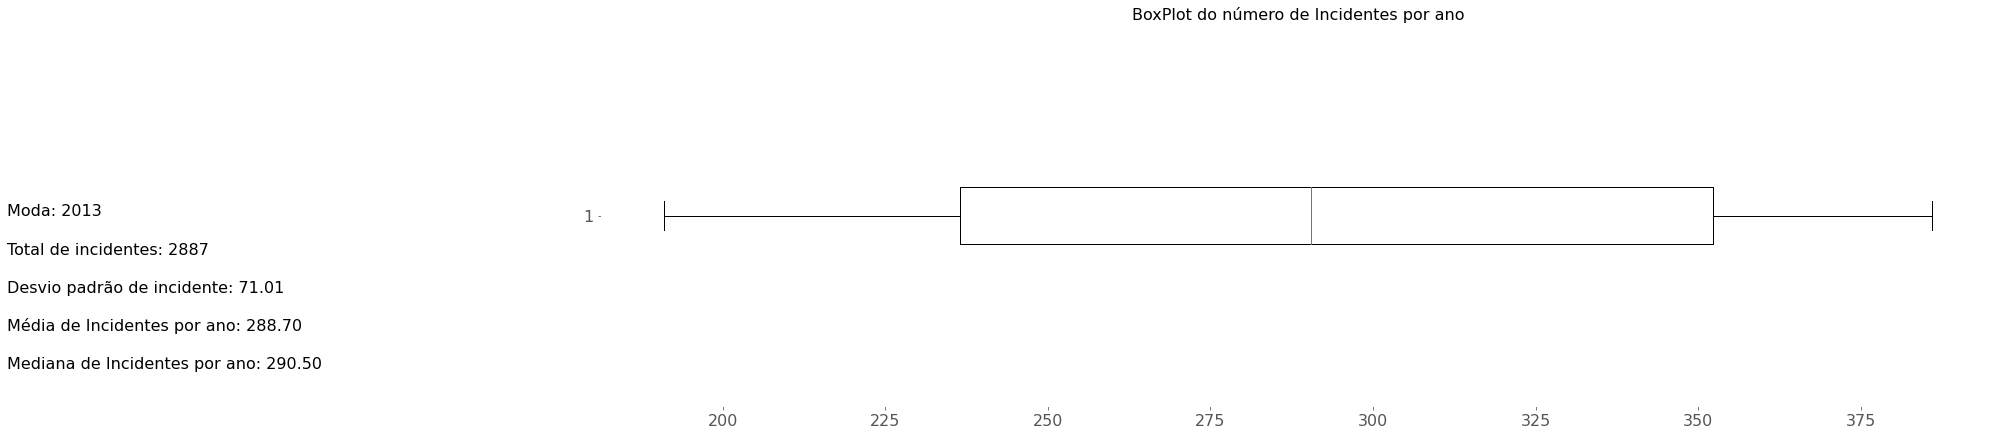

In [ ]:
 
list_tipos_operacao = list(set(df_dados['ano'])) 
list_todos_incidentes = list(df_dados.loc[(df_dados['tipo']) == 'INCIDENTE', ['ano']]['ano']) 
df_qtd_incidentes_ano = pd.DataFrame({'ano': list_tipos_operacao, 'Incidentes': [list_todos_incidentes.count(i) for i in list_tipos_operacao]}) 
 
df_qtd_incidentes_ano = df_qtd_incidentes_ano.sort_values(['Incidentes']) 
soma_incidentes = df_qtd_incidentes_ano['Incidentes'].sum()

list_tipos_operacao = list(set(df_dados['ano']))
list_todos_incidentes_graves = list(df_dados.loc[(df_dados['tipo']) == 'INCIDENTE GRAVE', ['ano']]
                         ['ano'])
df_qtd_incidentes_graves_ano = pd.DataFrame({'ano': list_tipos_operacao, 'Incidentes Graves': [list_todos_incidentes_graves.count(i) for i in list_tipos_operacao]})
df_qtd_incidentes_graves_ano = df_qtd_incidentes_graves_ano.sort_values(['Incidentes Graves'])
soma_incidentes_graves = df_qtd_incidentes_graves_ano['Incidentes Graves'].sum()

list_tipos_operacao = list(set(df_dados['ano']))
todos_acidentes = list(df_dados.loc[(df_dados['tipo']) == 'ACIDENTE', ['ano']]
                         ['ano'])
df_qtd_acidentes_ano = pd.DataFrame({'ano': list_tipos_operacao, 'Acidentes': [todos_acidentes.count(i) for i in list_tipos_operacao]})
df_qtd_acidentes_ano = df_qtd_acidentes_ano.sort_values(['Acidentes'])
soma_ac= df_qtd_acidentes_ano['Acidentes'].sum()
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=BIGGER_SIZE-5)     
plt.rc('axes', labelsize=BIGGER_SIZE-5)    
plt.rc('xtick', labelsize=BIGGER_SIZE)    
plt.rc('ytick', labelsize=BIGGER_SIZE)    
plt.rc('legend', fontsize=BIGGER_SIZE)     
plt.rc('figure', titlesize=BIGGER_SIZE)
fig,ax = plt.subplots(figsize=(25,7))

plt.text(90, 0.6, 'Mediana de Incidentes por ano: %.2f'%(np.median(np.array(df_qtd_incidentes_ano['Incidentes']))))
plt.text(90, 0.7, 'Média de Incidentes por ano: %.2f'%(np.mean(np.array(df_qtd_incidentes_ano['Incidentes']))))
plt.text(90, 0.8, 'Desvio padrão de incidente: %.2f'%(static.stdev(list_todos_incidentes.count(i) for i in list_tipos_operacao)))
plt.text(90, 0.9, 'Total de incidentes: %d'%(soma_incidentes))
plt.text(90, 1.0, 'Moda: %d'%(static.mode(list_todos_incidentes)))
plt.boxplot(df_qtd_incidentes_ano['Incidentes'], 0, 'rs', 0)
plt.title('BoxPlot do número de Incidentes por ano',size=BIGGER_SIZE)
ax.set_facecolor(color='white')
plt.show()

Observamos neste gráfico que, em **2013** tivemos uma média de **288.70 incidentes**.

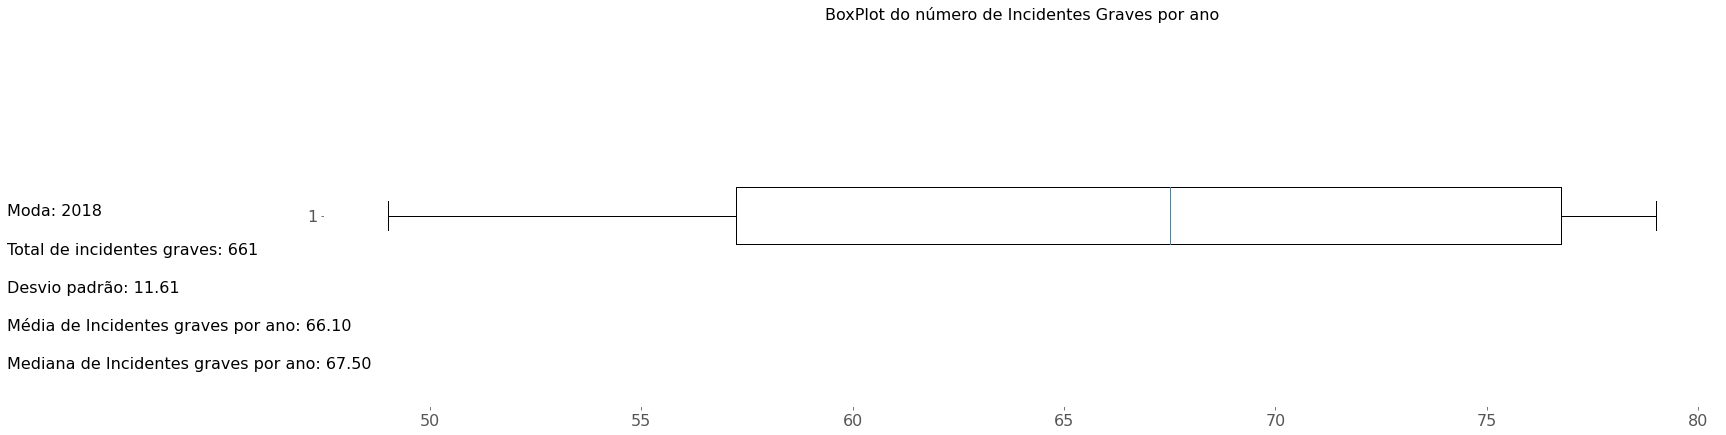

In [ ]:
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=BIGGER_SIZE-5)     
plt.rc('axes', labelsize=BIGGER_SIZE-5)    
plt.rc('xtick', labelsize=BIGGER_SIZE)    
plt.rc('ytick', labelsize=BIGGER_SIZE)    
plt.rc('legend', fontsize=BIGGER_SIZE)     
plt.rc('figure', titlesize=BIGGER_SIZE)
fig,ax = plt.subplots(figsize=(25,7))
ax.set_facecolor(color='white')
plt.text(40, 0.6, 'Mediana de Incidentes graves por ano: %.2f'%(np.median(np.array(df_qtd_incidentes_graves_ano['Incidentes Graves']))))
plt.text(40, 0.7, 'Média de Incidentes graves por ano: %.2f'%(np.mean(np.array(df_qtd_incidentes_graves_ano['Incidentes Graves']))))
plt.text(40, 0.8, 'Desvio padrão: %.2f'%(static.stdev(list_todos_incidentes_graves.count(i) for i in list_tipos_operacao)))
plt.text(40, 0.9, 'Total de incidentes graves: %d'%(soma_incidentes_graves))
plt.text(40, 1.0, 'Moda: %d'%(static.mode(list_todos_incidentes_graves)))
plt.boxplot(df_qtd_incidentes_graves_ano['Incidentes Graves'], 0, 'rs', 0)
plt.title('BoxPlot do número de Incidentes Graves por ano',size=BIGGER_SIZE)
plt.show()

Neste gráfico observamos um número maior de incidentes graves ocorridos no ano de **2018, com 661 incidentes. E desvio padrão de 11.61.**

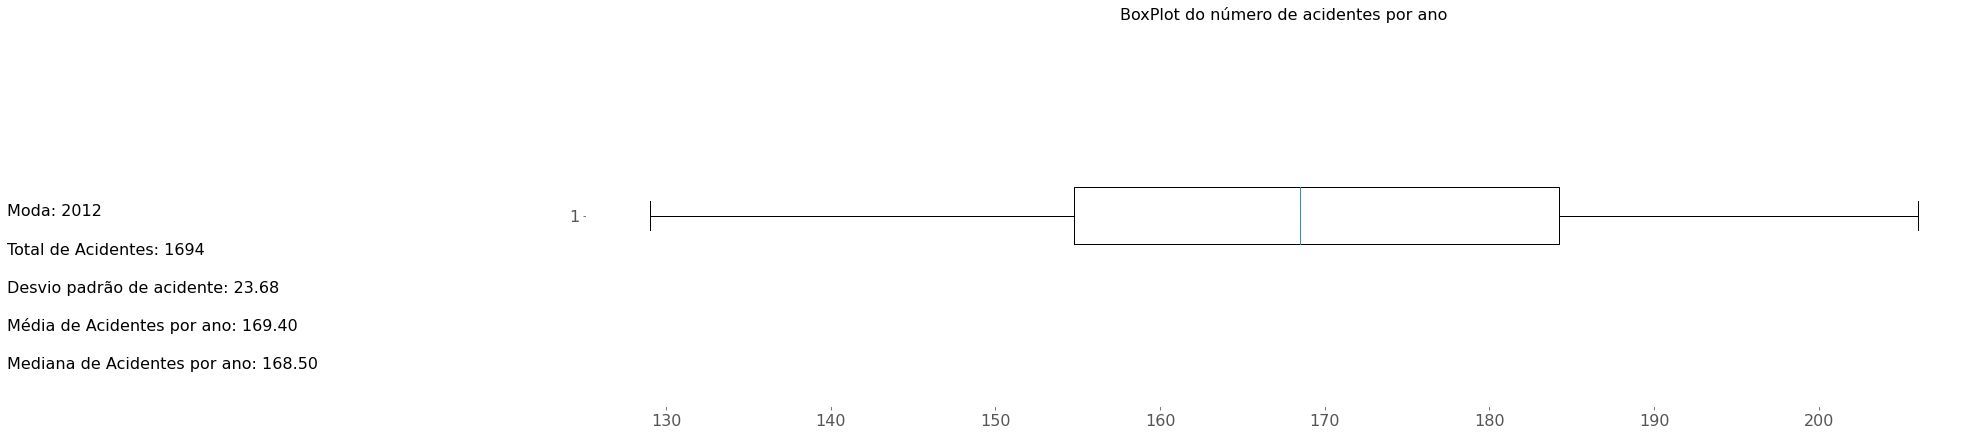

In [ ]:
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=BIGGER_SIZE-5)     
plt.rc('axes', labelsize=BIGGER_SIZE-5)    
plt.rc('xtick', labelsize=BIGGER_SIZE)    
plt.rc('ytick', labelsize=BIGGER_SIZE)    
plt.rc('legend', fontsize=BIGGER_SIZE)     
plt.rc('figure', titlesize=BIGGER_SIZE)
fig,ax = plt.subplots(figsize=(25,7))
ax.set_facecolor(color='white')
plt.text(90, 0.6, 'Mediana de Acidentes por ano: %.2f'%(np.median(np.array(df_qtd_acidentes_ano['Acidentes']))))
plt.text(90, 0.7, 'Média de Acidentes por ano: %.2f'%(np.mean(np.array(df_qtd_acidentes_ano['Acidentes']))))
plt.text(90, 0.8, 'Desvio padrão de acidente: %.2f'%(static.stdev(todos_acidentes.count(i) for i in list_tipos_operacao)))
plt.text(90, 0.9, 'Total de Acidentes: %d'%(soma_ac))
plt.text(90, 1.0, 'Moda: %d'%(static.mode(todos_acidentes)))

plt.boxplot(df_qtd_acidentes_ano['Acidentes'], 0, 'rs', 0)
plt.title('BoxPlot do número de acidentes por ano',size=BIGGER_SIZE)
plt.show()

Pode-se observar neste gráfico que, o número total de acidentes ocorridos no ano de **2012** foi de **1.694**, com uma **mediana anual de incidentes de 168.50.**

# Ocorrências por estado

Quantidade de ocorrências por ordem decrescente separados por estados do Brasil.

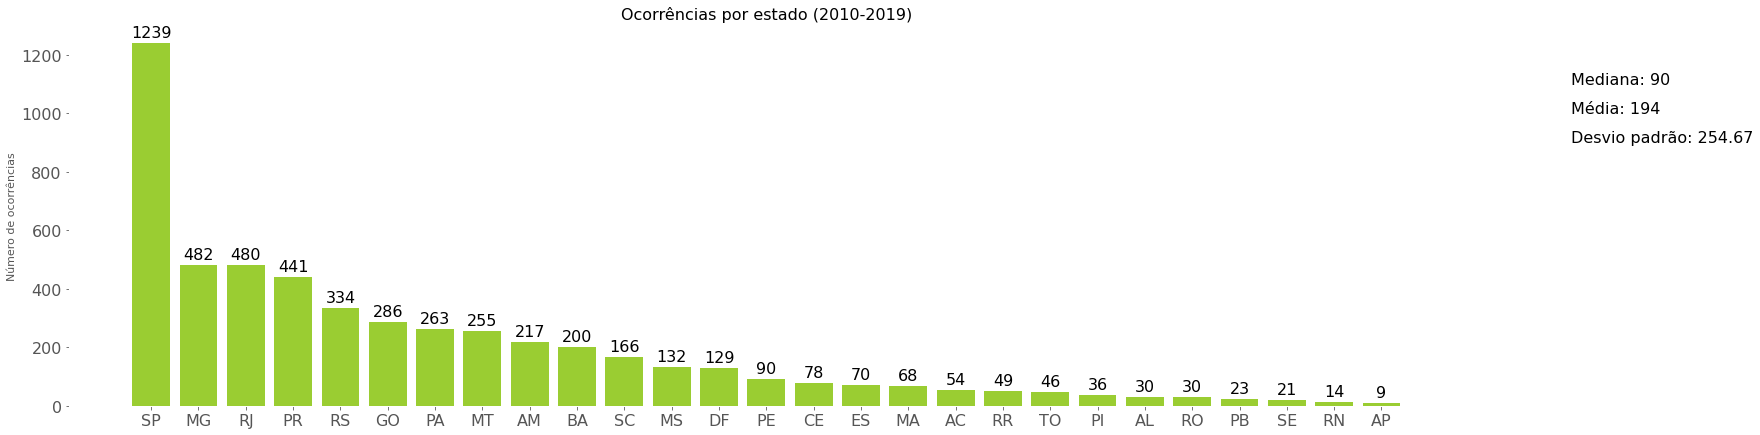

In [ ]:
count_estado = Counter(df_dados['estado'])
list_fase_estado = sorted(count_estado, key = count_estado.get, reverse = True)
list_contador_estado = sorted(list(count_estado.values()), reverse = True)

plt.style.use("ggplot")
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=BIGGER_SIZE-5)     
plt.rc('axes', labelsize=BIGGER_SIZE-5)    
plt.rc('xtick', labelsize=BIGGER_SIZE)    
plt.rc('ytick', labelsize=BIGGER_SIZE)    
plt.rc('legend', fontsize=BIGGER_SIZE)     
plt.rc('figure', titlesize=BIGGER_SIZE)
fig,ax = plt.subplots(figsize=(25,7))
ax.set_facecolor(color='white')

x=list_fase_estado
y=list_contador_estado

rects1=ax.bar(x, y,color='#9ACD32')

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por estado (2010-2019)', size=BIGGER_SIZE)
plt.text(30, 1100.9, 'Mediana: %d'%(np.median(np.array(list_contador_estado))))
plt.text(30, 1000.9, 'Média: %d'%(np.mean(np.array(list_contador_estado))))
plt.text(30, 900.8, 'Desvio padrão: %.2f'%(static.stdev(list_contador_estado)))   

formatar_dados_na_parte_superior_da_barra(rects1, ax)

plt.show()
               

O Sudeste concentra 45% das viagens de avião feitas pelos brasileiros, tendo o maior índice de ocorrências e acidentes. Na descrição por estados, **São Paulo lidera o número de ocorrências (1.239)**, sendo seguido por Minas Gerais (482) e Rio de Janeiro (480). 

O Norte concentra 7,1%, das viagens de avião feitas pelos brasileiros, tendo o menor índice de ocorrências e acidente, o estado do **Amapá tem o menor índice (9).**

Devido a quantidade elevada de incidentes ocorridos no Sudeste, a média estadual do período compreendido de 2010 a 2019, foi de 194.


# Ocorrências por cidade
Apresenta as dez cidades com mais ocorrências em ordem decrescente.

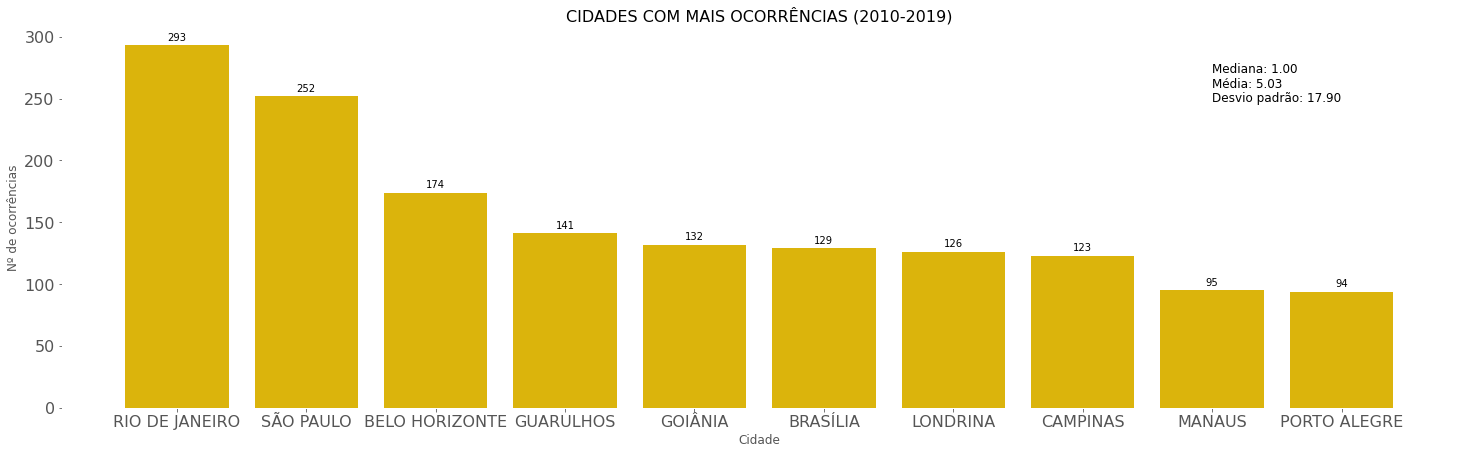

In [ ]:
cidades = Counter(df_dados['cidade'])
nome_das_cidades = sorted(cidades, key = cidades.get, reverse = True)
contador_ocorrencias_nas_cidades = sorted(list(cidades.values()), reverse = True)

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(25, 7))

x = nome_das_cidades[:10]
y = contador_ocorrencias_nas_cidades[:10]

rects1 = ax.bar(x, y, color="#DBB40C")

ax.set_xlabel('Cidade', size = 12)
ax.set_ylabel('Nº de ocorrências', size = 12)
ax.set_title('CIDADES COM MAIS OCORRÊNCIAS (2010-2019)', size = 16)
ax.set_xticks(x)
ax.set_facecolor(color='white')

plt.text(8, 270.9, 'Mediana: %.2f'%(np.median(np.array(contador_ocorrencias_nas_cidades))), size = 12)
plt.text(8, 258.9, 'Média: %.2f'%(np.mean(np.array(contador_ocorrencias_nas_cidades))), size = 12)
plt.text(8, 247.8, 'Desvio padrão: %.2f'%(static.stdev(contador_ocorrencias_nas_cidades)), size = 12)   

formatar_dados_na_parte_superior_da_barra(rects1, ax)

plt.grid(False)
plt.show()

Podemos analisar através do gráfico que a cidade com maior quantidade de ocorrências no período entre 2010 á 2019 foi **Rio de Janeiro** com **293**, com uma grande alta de damandas de voos comerciais e privados, seguido por **São Paulo** com **252** ocorrencias no mesmo período.

Com uma quantidade **5568** municípios brasileiros, **1042** tiveram pelo menos **1** ocorrência, correspondendo a exatos **18,71** das cidades contidas no Brasil.

Durante o periodo comentado, a **média** de ocorrências ficou em **5,03**

Jutando as 10 cidades citadas nos gráficos, a porcentagem de ocorrências gira em torno de 29% do total.

# Ocorrências por fase de Operação
Apresenta as 10 ocorrências durante as fases do voo.

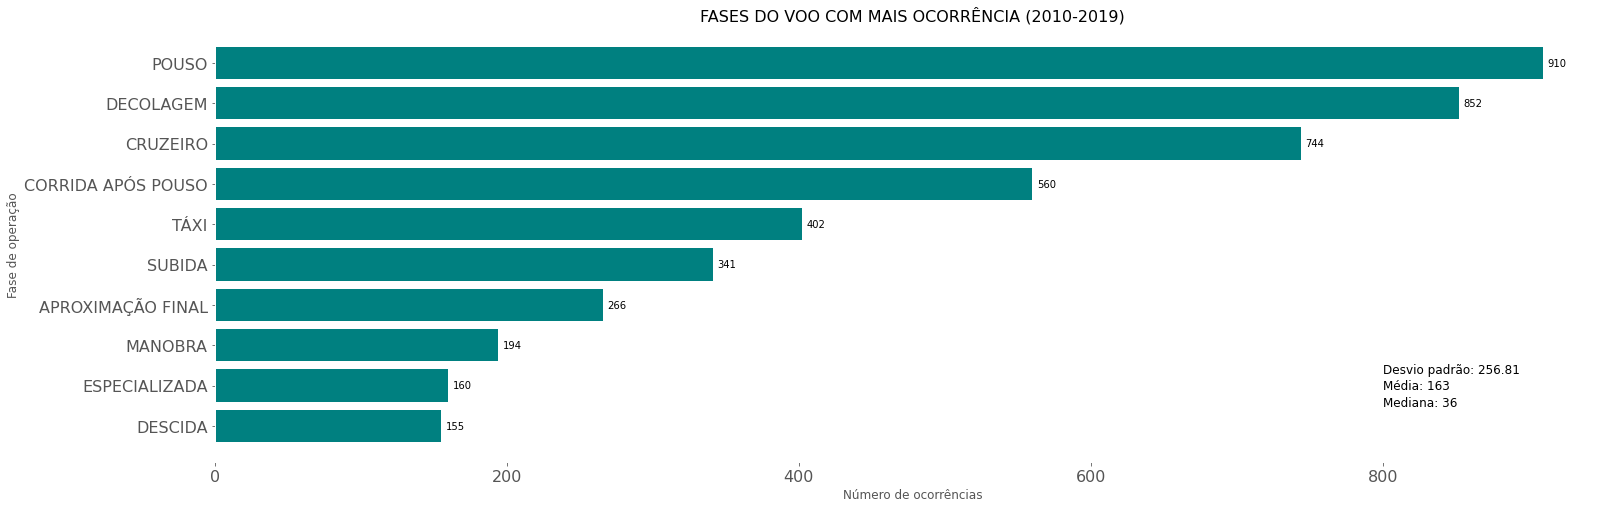

In [ ]:
fases_e_ocorrencias_da_aeronave = Counter(df_dados['aeronave_fase_operacao'])
fases_da_aeronave = sorted(fases_e_ocorrencias_da_aeronave, key = fases_e_ocorrencias_da_aeronave.get, reverse = True)
contador_de_ocorrencias = sorted(list(fases_e_ocorrencias_da_aeronave.values()), reverse = True)

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(25, 8))

x = fases_da_aeronave[:10]
y = contador_de_ocorrencias[:10]

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
ax.set_xlabel('Número de ocorrências', size = 12)
ax.set_ylabel('Fase de operação', size = 12)
ax.set_title('FASES DO VOO COM MAIS OCORRÊNCIA (2010-2019)', size = 16)
ax.barh(x, y, color='#008080')
ax.set_facecolor('white')

plt.text(800, 8.5, 'Mediana: %d'%(np.median(np.array(contador_de_ocorrencias))), size = 12)
plt.text(800, 8.1, 'Média: %d'%(np.mean(np.array(contador_de_ocorrencias))), size = 12)
plt.text(800, 7.7, 'Desvio padrão: %.2f'%(static.stdev(contador_de_ocorrencias)), size = 12)

plt.show()

Observando o gráfico sobre: "Fases do voo com mais ocorrência (2010-2019)", **Pouso** apresenta o maior número de registros, com um total de **910**. Seguido por decolagem com um número de **852**.

A **Média** dada nesse período ficou com o número de **163**.

Jutando as 10 fases citadas nos gráficos, a porcentagem de ocorrências apresentadas gira em torno de **87%** do total.

# Ocorrências por ano de fabricação da aeronave

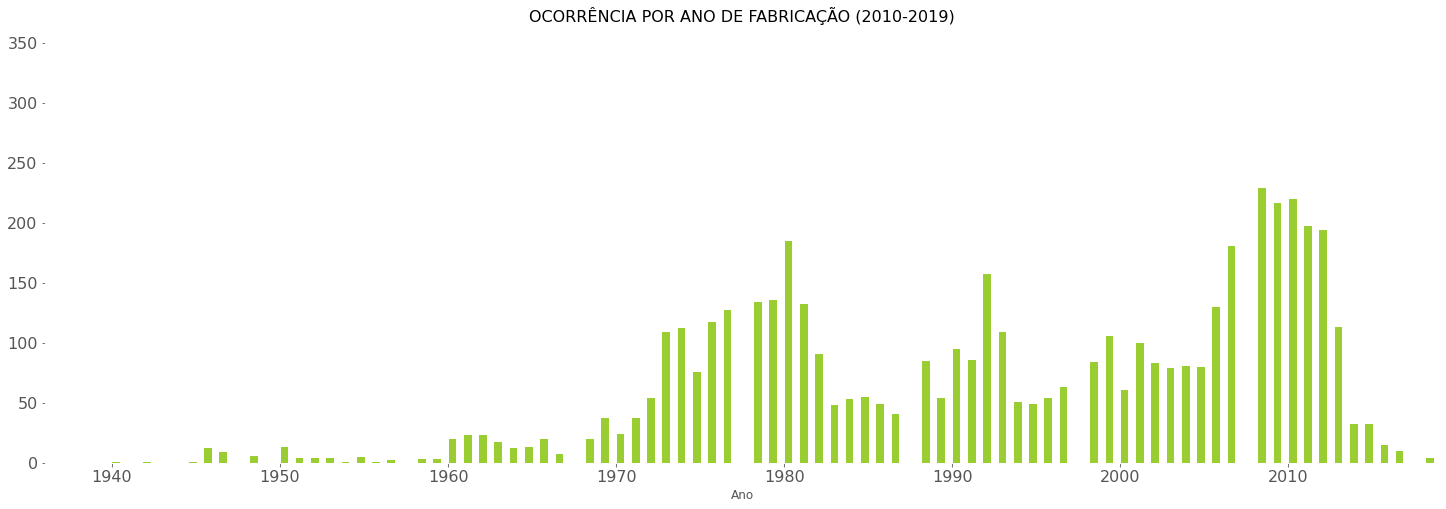

In [ ]:
plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(25,8)) 

x = df_dados.aeronave_ano_fabricacao 

plt.hist(x, color='#9ACD32', lw=0,  bins=11000, rwidth=0.5)
ax.set_facecolor(color='white')


mn, mx = plt.xlim()
plt.xlim(mn, mx)
ax.set_xlim([1936,2019])   

ax.set_xlabel('Ano')
ax.set_title('OCORRÊNCIA POR ANO DE FABRICAÇÃO (2010-2019)', size = 16)

plt.show()

Observando o gráfico sobre: "Ocorrências por ano de fabricação (1940-2019)", o ano de **2008** é o que aprensenta o maior número de ocorrência com o total de **229*.

Os anos que apresentaram menor número de ocorrências tem um indice aproximado de **1** foram: **1940**, **1942**, **1945**, **1954**, **1956**.

A **Média** apresentada nesse período ficou com o número de **67**.

Jutando os 10 anos de fabricação citado no gráfico, a porcentagem de ocorrências gira em torno de **39,31%** do total.

# Principais ocorrências
Apresenta as dez principais ocorrências.

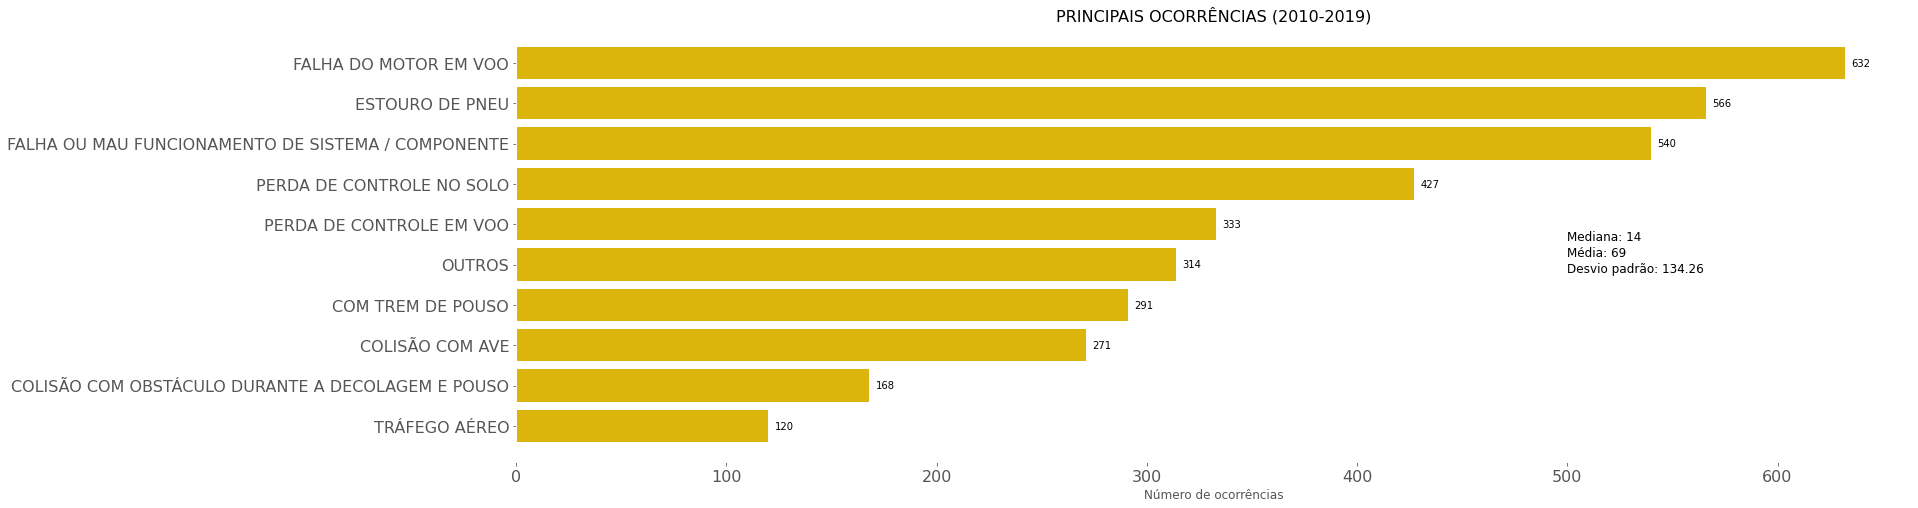

In [ ]:
ocorrencias = Counter(df_dados['descricao'])
descricao_ocorrencias = sorted(ocorrencias, key = ocorrencias.get, reverse = True)
contador_de_ocorrencias = sorted(list(ocorrencias.values()), reverse = True)

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(25, 8))

x = descricao_ocorrencias[:10]
y = contador_de_ocorrencias[:10]

ax.barh(x, y, color='#DBB40C')
ax.set_facecolor('white')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
ax.set_xlabel('Número de ocorrências', size = 12)
ax.set_title('PRINCIPAIS OCORRÊNCIAS (2010-2019)', size = 16)

plt.text(500, 4.4, 'Mediana: %d'%(np.median(np.array(contador_de_ocorrencias))), size = 12)
plt.text(500, 4.8, 'Média: %d'%(np.mean(np.array(contador_de_ocorrencias))), size = 12)
plt.text(500, 5.2, 'Desvio padrão: %.2f'%(static.stdev(contador_de_ocorrencias)), size = 12)

plt.show()

Observando o gráfico sobre "Principais Ocorrências (2010-2019)", nota-se que **Falha do motor em voo** apresentou um número de **632** ocorrências nesse período. Seguido por estouro de pneu com um total de **566* ocorrências.

Geralmente o gera a falha de motor em voos está associado a problemas nas valvulas, onde as mesmas emperram ou quebram as hastes. Isso pode ocorrer por conta do óleo ou combustível de má qualidade ou até mesmo manutenção em periódo superior ao recomendado.

A **Média** apresentada nesse período ficou com o número de **69**.

Jutando as 10 principais ocorrências citadas no gráfico, a porcentagem gira em torno de **69,85%** do total.

# Ocorrências por tipo de motor
Apresenta as ocorrências por tipo de motor.

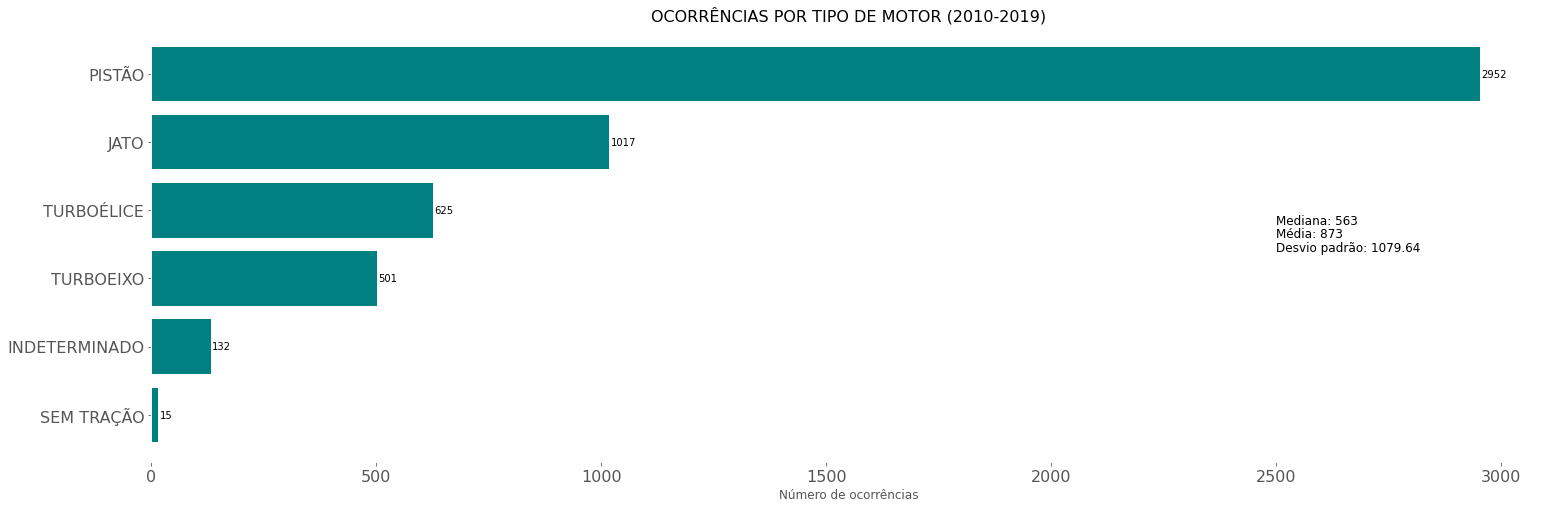

In [ ]:
tipos_de_motor = Counter(df_dados['motor_tipo'])
nome_tipo_de_motor = sorted(tipos_de_motor, key = tipos_de_motor.get, reverse = True)
contador_tipo_de_motor = sorted(list(tipos_de_motor.values()), reverse = True)

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(25, 8))

x = nome_tipo_de_motor
y = contador_tipo_de_motor

ax.barh(x, y, color='#008080')
ax.set_facecolor("white")

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
ax.set_xlabel('Número de ocorrências', size = 12)
ax.set_title('OCORRÊNCIAS POR TIPO DE MOTOR (2010-2019)', size = 16)

plt.text(2500, 2.2, 'Mediana: %d'%(np.median(np.array(contador_tipo_de_motor))), size = 12)
plt.text(2500, 2.4, 'Média: %d'%(np.mean(np.array(contador_tipo_de_motor))), size = 12)
plt.text(2500, 2.6, 'Desvio padrão: %.2f'%(static.stdev(contador_tipo_de_motor)), size = 12)

plt.show()

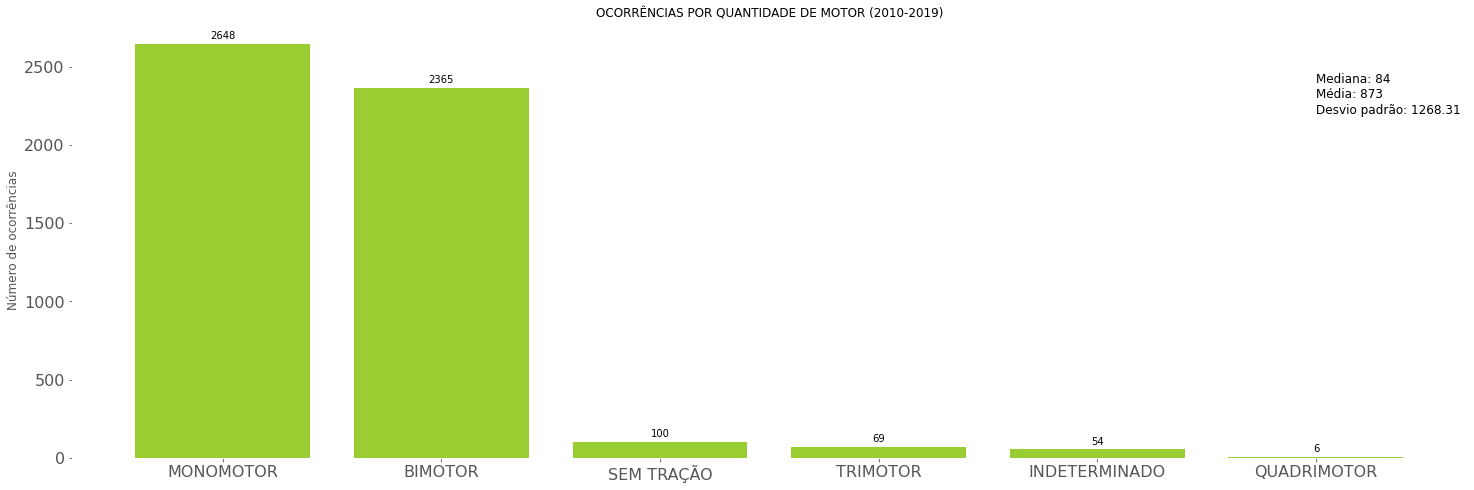

In [ ]:
quantidade_motor = Counter(df_dados['aeronave_motor_quantidade'])
nome_tipo_de_motor = sorted(quantidade_motor, key = quantidade_motor.get, reverse = True)
contador_ocorrencia_motor = sorted(list(quantidade_motor.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(25, 8))

x = nome_tipo_de_motor
y = contador_ocorrencia_motor

rects1 = ax.bar(x, y, color='#9ACD32')
ax.set_facecolor('white')

plt.xlabel('')
ax.set_xticks(x)
ax.set_ylabel("Número de ocorrências", size = 12)
ax.set_title('OCORRÊNCIAS POR QUANTIDADE DE MOTOR (2010-2019)', size = 12)

plt.text(5, 2400.2, 'Mediana: %d'%(np.median(np.array(contador_ocorrencia_motor))), size = 12)
plt.text(5, 2300.4, 'Média: %d'%(np.mean(np.array(contador_ocorrencia_motor))), size = 12)
plt.text(5, 2200.5, 'Desvio padrão: %.2f'%(static.stdev(contador_ocorrencia_motor)), size = 12)

formatar_dados_na_parte_superior_da_barra(rects1, ax)

plt.show()

# Ocorrências por quantidade de motores
Apresenta ocorrências por quantidade de motores.

Observando o gráfico sobre: "Ocorrências por quantidade de motor (2010-2019)", nota-se que **Monomotor** apresenta o maior número de ocorrências com um total de **2648**. Seguido por **Bimotor** com um total de **2365**.

O motor com maior número de ocorrências representa em porcentagem um total de **50,51%**, levando em consideração os modelos apontados no gráfico acima.

O motor com menos frequências de ocorrências são os **Quadrimotor** com um total de **6**.

A **Média** apresentada nesse período em relação aos motores ficou com o número de **873**.

Observando o gráfico sobre: "Ocorrências por tipo de motor (2010-2019)", nota-se que **Pistão** apresentou um número de **2952** de ocorrências nesse período. Seguido por **Jato** com um total de **1017* ocorrências.

O maior número com registros apresentados através dos motores de **Pistão**, representam uma procentagem de **56,31**.

O motor com menos frequências de ocorrências são os **Sem tração** com um total de **15**.

A **Média** apresentada nesse período ficou com o número de **873**.


# Ocorrência por saída de pista
Apresenta o percentual de ocorrências por saída de pista.

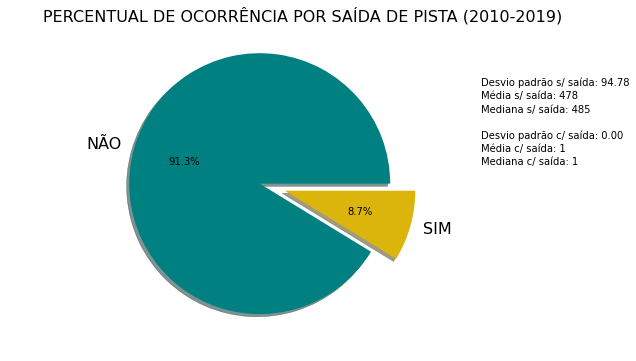

In [ ]:
ocorrencia_na_saida_pista = Counter(df_dados['ocorrencia_saida_pista'])
valores_ocorrencia_na_saida_pista = sorted(ocorrencia_na_saida_pista, key = ocorrencia_na_saida_pista.get, reverse = True)
contador_de_ocorrencia_na_saida_pista = sorted(list(ocorrencia_na_saida_pista.values()), reverse = True)

sim_por_ano = list(set(df_dados['ano']))
todos_os_sim = list(df_dados.loc[(df_dados['ocorrencia_saida_pista']) == 'SIM', ['ano']]
                         ['ano'])
quantidade_sim_por_ano = pd.DataFrame({'ano': sim_por_ano, 'SIM': [sim_por_ano.count(i) for i in sim_por_ano]})
quantidade_sim_por_ano = quantidade_sim_por_ano.sort_values(['SIM'])
soma_dos_sim = quantidade_sim_por_ano['SIM'].sum()

nao_por_ano = list(set(df_dados['ano']))
todos_os_nao = list(df_dados.loc[(df_dados['ocorrencia_saida_pista']) == 'NÃO', ['ano']]
                         ['ano'])
quantidade_nao_por_ano = pd.DataFrame({'ano': nao_por_ano, 'NÃO': [todos_os_nao.count(i) for i in nao_por_ano]})
quantidade_nao_por_ano = quantidade_nao_por_ano.sort_values(['NÃO'])
soma_dos_nao = quantidade_nao_por_ano['NÃO'].sum()

plt.style.use("ggplot")
plt.title('       PERCENTUAL DE OCORRÊNCIA POR SAÍDA DE PISTA (2010-2019)', size = 16)

df_dados['ocorrencia_saida_pista'].value_counts().plot(kind='pie', explode=(0.2, 0),  
      shadow=True, colors=('#008080','#DBB40C','#9ACD32'), autopct='%1.1f%%' ,label="Classificação de Ocorrências" ,figsize=(6, 6))
plt.ylabel('')

plt.text(1.5, 0.2, 'Mediana c/ saída: %d'%(np.median(np.array(quantidade_sim_por_ano['SIM']))))
plt.text(1.5, 0.3, 'Média c/ saída: %d'%(np.mean(np.array(quantidade_sim_por_ano['SIM']))))
plt.text(1.5, 0.4, 'Desvio padrão c/ saída: %.2f'%(static.stdev(quantidade_sim_por_ano['SIM'])))
plt.text(1.5, 0.6, 'Mediana s/ saída: %d'%(np.median(np.array(quantidade_nao_por_ano['NÃO']))))
plt.text(1.5, 0.7, 'Média s/ saída: %d'%(np.mean(np.array(quantidade_nao_por_ano['NÃO']))))
plt.text(1.5, 0.8, 'Desvio padrão s/ saída: %.2f'%(static.stdev(quantidade_nao_por_ano['NÃO'])))

plt.show()

Observando o gráfico sobre: "Percentual de ocorrências por saída de pista (2010-2019)", com um total de **91,3%**, a maioria das ocorrências **Não** foram ocasionadas por saída de aeronave da pista.

A **Média** apresentada nesse período **sem saída da pista** ficou com o número de **478**. Enquanto a **com saída da pista** teve um número de **1**.

Os dados apresentados levam em consideração o alto nível de segurança no ambiente aéreo brasileiro, onde o mesmo é seguido de forma meticulosa.

# Ocorrência por fabricantes
Apresenta ocorrências por fabricantes.

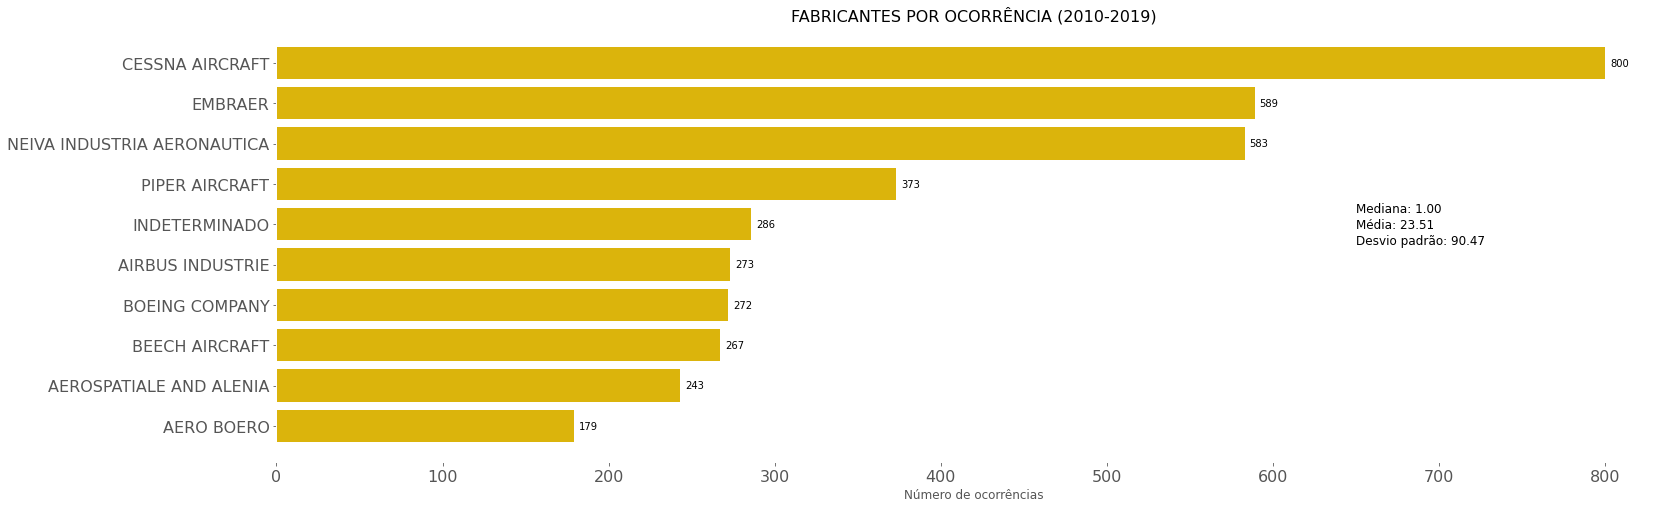

In [ ]:
ocorrencias_por_fabricante = Counter(df_dados['aeronave_fabricante'])
nome_fabricantes = sorted(ocorrencias_por_fabricante, key = ocorrencias_por_fabricante.get, reverse = True)
contador_quantidade_de_ocorrencias = sorted(list(ocorrencias_por_fabricante.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(25, 8))

x = nome_fabricantes[:10]
y = contador_quantidade_de_ocorrencias[:10]

ax.barh(x, y, color='#DBB40C')
ax.set_facecolor('white')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
ax.set_xlabel('Número de ocorrências')
ax.set_title('FABRICANTES POR OCORRÊNCIA (2010-2019)', size = 16)

plt.text(650, 3.7, 'Mediana: %.2f'%(np.median(np.array(contador_quantidade_de_ocorrencias))), size = 12)
plt.text(650, 4.1, 'Média: %.2f'%(np.mean(np.array(contador_quantidade_de_ocorrencias))), size = 12)
plt.text(650, 4.5, 'Desvio padrão: %.2f'%(static.stdev(contador_quantidade_de_ocorrencias)), size = 12)

plt.show()

Observando o gráfico sobre: "Fabricantes por ocorrência (2010-2019)", o fabricante com o número maior de ocorrências foi a **Cessna-Aircraft** com um número total de **800** registros. Seguido da **Embraer** com um número de **589**

A **Média** apresentada nesse período ficou com o número de **23.51**.

Jutando as 10 fabricantes citadas no gráfico, a porcentagem gira em torno de **73,73%** do total.

# Ocorrência por país-fabricante

Apresenta os TOP 10 Países fabricantes com mais ocorrências.

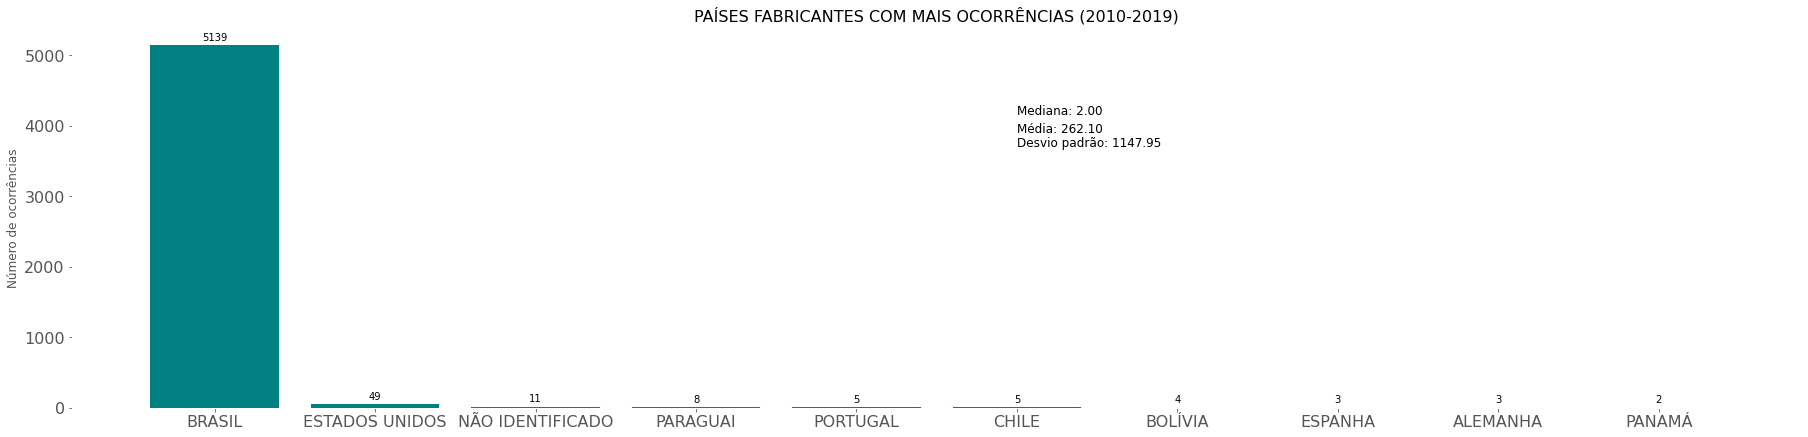

In [ ]:
paises_fabricantes = Counter(df_dados['aeronave_pais_fabricante'])
nome_dos_paises_fabricantes = sorted(paises_fabricantes, key = paises_fabricantes.get, reverse = True)
contador_ocorrencias_por_paises = sorted(list(paises_fabricantes.values()), reverse = True)

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(31, 7))

x = nome_dos_paises_fabricantes[:10]
y = contador_ocorrencias_por_paises[:10]

rects1 = ax.bar(x, y,color='#008080')
ax.set_facecolor('white')

ax.set_xticks(x)

ax.set_ylabel("Número de ocorrências")
ax.set_title('PAÍSES FABRICANTES COM MAIS OCORRÊNCIAS (2010-2019)', size = 16)

plt.text(5, 4158.2, 'Mediana: %.2f'%(np.median(np.array(contador_ocorrencias_por_paises))), size = 12)
plt.text(5, 3909.3, 'Média: %.2f'%(np.mean(np.array(contador_ocorrencias_por_paises))), size = 12)
plt.text(5, 3709.5, 'Desvio padrão: %.2f'%(static.stdev(contador_ocorrencias_por_paises)), size = 12)

formatar_dados_na_parte_superior_da_barra(rects1, ax)

plt.show()

Observando o gráfico sobre: "Paises Fabricantes com mais ocorrências (2010-2019)", o pais com maior número de ocorrências foi o **Brasil**, com o número total de **5139**. Seguido pelos **Estados unidos** com um número de **49** ocorrências.

O pais com o menor número de fabricação foi o panamá com um total de **2**

A **Média** apresentada nesse período ficou com o número de **262.10**.

# Nível de Dano

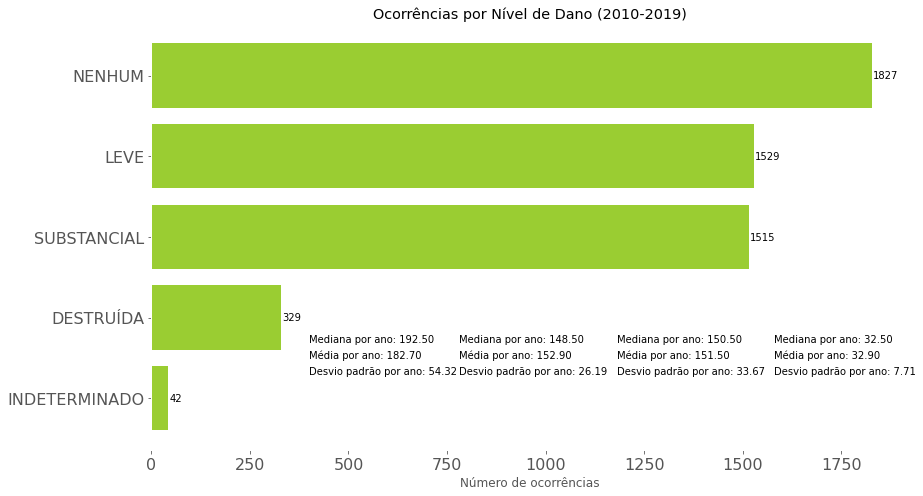

In [ ]:
aeronave_nivel_dano = Counter(df_dados['aeronave_nivel_dano'])
fase_aeronave_nivel_dano = sorted(aeronave_nivel_dano, key = aeronave_nivel_dano.get, reverse = True)
contador_aeronave_nivel_dano = sorted(list(aeronave_nivel_dano.values()), reverse = True)

#ocorrência por ano e por nível de dano = NENHUM
danos_nenhum = list(set(df_dados['ano']))
danos = list(df_dados.loc[(df_dados['aeronave_nivel_dano']) == 'NENHUM', ['ano']]
                         ['ano'])
qtd_nenhum_ano = pd.DataFrame({'ano': danos_nenhum, 'NENHUM': [danos.count(i) for i in danos_nenhum]})
qtd_nenhum_ano = qtd_nenhum_ano.sort_values(['NENHUM'])
soma_nenhum= qtd_nenhum_ano['NENHUM'].sum()

#ocorrência por ano e por nível de dano = LEVE
danos_leve = list(set(df_dados['ano']))
danos = list(df_dados.loc[(df_dados['aeronave_nivel_dano']) == 'LEVE', ['ano']]
                         ['ano'])
qtd_leve_ano = pd.DataFrame({'ano': danos_leve, 'LEVE': [danos.count(i) for i in danos_leve]})
qtd_leve_ano = qtd_leve_ano.sort_values(['LEVE'])
soma_leve= qtd_leve_ano['LEVE'].sum()

#ocorrência por ano e por nível de dano = SUBSTANCIAL
danos_substancial = list(set(df_dados['ano']))
danos = list(df_dados.loc[(df_dados['aeronave_nivel_dano']) == 'SUBSTANCIAL', ['ano']]
                         ['ano'])
qtd_substancial_ano = pd.DataFrame({'ano': danos_substancial, 'SUBSTANCIAL': [danos.count(i) for i in danos_substancial]})
qtd_substancial_ano = qtd_substancial_ano.sort_values(['SUBSTANCIAL'])
soma_substancial= qtd_substancial_ano['SUBSTANCIAL'].sum()

#ocorrência por ano e por nível de dano = DESTRUÍDA
danos_destruida = list(set(df_dados['ano']))
danos = list(df_dados.loc[(df_dados['aeronave_nivel_dano']) == 'DESTRUÍDA', ['ano']]
                         ['ano'])
qtd_destruida_ano = pd.DataFrame({'ano': danos_destruida, 'DESTRUÍDA': [danos.count(i) for i in danos_destruida]})
qtd_destruida_ano = qtd_destruida_ano.sort_values(['DESTRUÍDA'])
soma_destruida= qtd_destruida_ano['DESTRUÍDA'].sum()

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=fase_aeronave_nivel_dano
y=contador_aeronave_nivel_dano

ax.barh(x, y, color='#9ACD32')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
ax.set_facecolor('white')
plt.xlabel('Número de ocorrências')

plt.title('Ocorrências por Nível de Dano (2010-2019)')
plt.text(400, 3.3, 'Mediana por ano: %.2f'%(np.median(np.array(qtd_nenhum_ano['NENHUM']))))
plt.text(400, 3.5, 'Média por ano: %.2f'%(np.mean(np.array(qtd_nenhum_ano['NENHUM']))))
plt.text(400, 3.7, 'Desvio padrão por ano: %.2f'%(static.stdev(qtd_nenhum_ano['NENHUM'])))

plt.text(780, 3.3, 'Mediana por ano: %.2f'%(np.median(np.array(qtd_leve_ano['LEVE']))))
plt.text(780, 3.5, 'Média por ano: %.2f'%(np.mean(np.array(qtd_leve_ano['LEVE']))))
plt.text(780, 3.7, 'Desvio padrão por ano: %.2f'%(static.stdev(qtd_leve_ano['LEVE'])))

plt.text(1180, 3.3, 'Mediana por ano: %.2f'%(np.median(np.array(qtd_substancial_ano['SUBSTANCIAL']))))
plt.text(1180, 3.5, 'Média por ano: %.2f'%(np.mean(np.array(qtd_substancial_ano['SUBSTANCIAL']))))
plt.text(1180, 3.7, 'Desvio padrão por ano: %.2f'%(static.stdev(qtd_substancial_ano['SUBSTANCIAL'])))

plt.text(1580, 3.3, 'Mediana por ano: %.2f'%(np.median(np.array(qtd_destruida_ano['DESTRUÍDA']))))
plt.text(1580, 3.5, 'Média por ano: %.2f'%(np.mean(np.array(qtd_destruida_ano['DESTRUÍDA']))))
plt.text(1580, 3.7, 'Desvio padrão por ano: %.2f'%(static.stdev(qtd_destruida_ano['DESTRUÍDA'])))
plt.tight_layout(w_pad=4, h_pad=3)

A maior quantia de ocorrências (**1827**) **não** gerou dano à aeronave, tendo em mente que a maior quantidade de ocorrências são incidentes.

A menor quantia de ocorrências (42) no período, gerou danos **indeterminados**

Segue abaixo as médias dos dados acima:

**Média** **sem danos** = **182,70** por ano.

**Média** **com danos leves**= **152,90** por ano.

**Média** **com danos substanciais** = **151,50** por ano.

**Média** **destruindo a aeronave** = **32,90** por ano.



# Status da Investigação

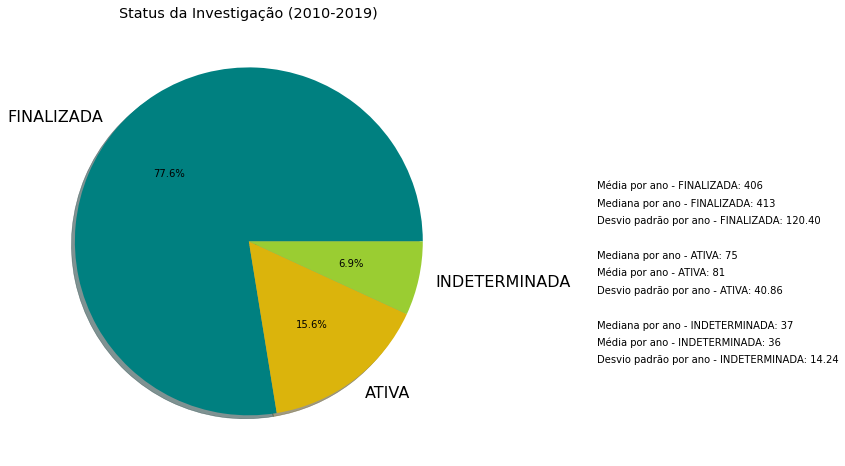

In [ ]:
#ocorrência por ano e por status de investigação = FINALIZADA
status_finalizada= list(set(df_dados['ano']))
dados_status_finalizada = list(df_dados.loc[(df_dados['status_investigacao']) == 'FINALIZADA', ['ano']]
                         ['ano'])
qtd_status_finalizada_ano = pd.DataFrame({'ANO': status_finalizada, 'FINALIZADA': [dados_status_finalizada.count(i) for i in status_finalizada]})
qtd_status_finalizada_ano = qtd_status_finalizada_ano.sort_values(['FINALIZADA'])
soma_status_finalizada= qtd_status_finalizada_ano['FINALIZADA'].sum()

#ocorrência por ano e por status de investigação = ATIVA

status_ativa= list(set(df_dados['ano']))
dados_status_ativa = list(df_dados.loc[(df_dados['status_investigacao']) == 'ATIVA', ['ano']]
                         ['ano'])
qtd_status_ativa_ano = pd.DataFrame({'ANO': status_ativa, 'ATIVA': [dados_status_ativa.count(i) for i in status_ativa]})
qtd_status_ativa_ano = qtd_status_ativa_ano.sort_values(['ATIVA'])
soma_status_ativa= qtd_status_ativa_ano['ATIVA'].sum()

#ocorrência por ano e por status de investigação = INDETERMINADA

status_indeterminada= list(set(df_dados['ano']))
dados_status_indeterminada = list(df_dados.loc[(df_dados['status_investigacao']) == 'INDETERMINADA', ['ano']]
                         ['ano'])
qtd_status_indeterminada_ano = pd.DataFrame({'ANO': status_indeterminada, 'INDETERMINADA': [dados_status_indeterminada.count(i) for i in status_indeterminada]})
qtd_status_indeterminada_ano = qtd_status_indeterminada_ano.sort_values(['INDETERMINADA'])
soma_status_indeterminada= qtd_status_indeterminada_ano['INDETERMINADA'].sum()

status_investigacao = Counter(df_dados['status_investigacao'])
fase_status_investigacao = sorted(status_investigacao, key = status_investigacao.get, reverse = True)
contador_status_investigacao = sorted(list(status_investigacao.values()), reverse = True)

plt.style.use("ggplot")
plt.title('Status da Investigação (2010-2019)')
plt.text(2, 0.2, 'Mediana por ano - FINALIZADA: %d'%(np.median(np.array(qtd_status_finalizada_ano['FINALIZADA']))))
plt.text(2, 0.3, 'Média por ano - FINALIZADA: %d'%(np.mean(np.array(qtd_status_finalizada_ano['FINALIZADA']))))
plt.text(2, 0.1, 'Desvio padrão por ano - FINALIZADA: %.2f'%(static.stdev(qtd_status_finalizada_ano['FINALIZADA'])))

plt.text(2, -0.1, 'Mediana por ano - ATIVA: %d'%(np.median(np.array(qtd_status_ativa_ano['ATIVA']))))
plt.text(2, -0.2, 'Média por ano - ATIVA: %d'%(np.mean(np.array(qtd_status_ativa_ano['ATIVA']))))
plt.text(2, -0.3, 'Desvio padrão por ano - ATIVA: %.2f'%(static.stdev(qtd_status_ativa_ano['ATIVA'])))

plt.text(2, -0.5, 'Mediana por ano - INDETERMINADA: %d'%(np.median(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))))
plt.text(2, -0.6, 'Média por ano - INDETERMINADA: %d'%(np.mean(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))))
plt.text(2, -0.7, 'Desvio padrão por ano - INDETERMINADA: %.2f'%(static.stdev(qtd_status_indeterminada_ano['INDETERMINADA'])))

status = df_dados['status_investigacao'].value_counts().plot(kind='pie', shadow=True, colors=('#008080','#DBB40C','#9ACD32'), autopct='%1.1f%%',label='',figsize=(15,8))

Ao observarmos o gráfico, notamos que grande parte das ocorrências (**4066**) teve sua investigação **finalizada**, representando **77,6%** do total investigado, pois a maior parte das ocorrências são de gravidade baixa.

A menor parte das ocorrências (360) teve sua investigação **indeterminada**, representando **6,9%** do total 

**Média** de ocorrências **finalizada** = **413** por ano.

**Média** de ocorrências **ativa** = **81** por ano.

**Média** de ocorrências **indeterminada** = **36** por ano.

# Liberação da aeronave

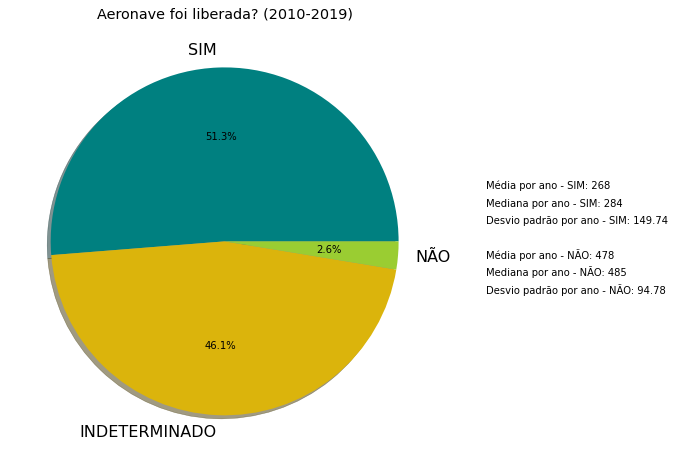

In [ ]:
#ocorrência por ano e por status de liberação = SIM
aeronave_liberada = list(set(df_dados['ano']))
todas_aeronave_liberada = list(df_dados.loc[(df_dados['aeronave_liberada']) == 'SIM', ['ano']]
                         ['ano'])
qtd_aeronave_liberada_ano = pd.DataFrame({'ano': aeronave_liberada, 'SIM': [todas_aeronave_liberada.count(i) for i in aeronave_liberada]})
qtd_aeronave_liberada_ano = qtd_aeronave_liberada_ano.sort_values(['SIM'])
total_qtd_aeronave_liberada_ano= qtd_aeronave_liberada_ano['SIM'].sum()

#ocorrência por ano e por status de liberação = NÃO
aeronave_nao_liberada = list(set(df_dados['ano']))
todas_aeronave_nao_liberada= list(df_dados.loc[(df_dados['ocorrencia_saida_pista']) == 'NÃO', ['ano']]
                         ['ano'])
qtd_nao_liberada_ano = pd.DataFrame({'ano': aeronave_nao_liberada, 'NÃO': [todas_aeronave_nao_liberada.count(i) for i in aeronave_nao_liberada]})
qtd_nao_liberada_ano = qtd_nao_liberada_ano.sort_values(['NÃO'])
total_qtd_nao_liberada_ano= qtd_nao_liberada_ano['NÃO'].sum()

#ocorrência por ano e por status de liberação = INDETERMINADO
aeronave_indeterminada = list(set(df_dados['ano']))
todas_aeronave_indeterminada= list(df_dados.loc[(df_dados['ocorrencia_saida_pista']) == 'INDETERMINADO', ['ano']]
                         ['ano'])
qtd_aeronave_indeterminada_ano = pd.DataFrame({'ano': aeronave_indeterminada, 'INDETERMINADO': [todas_aeronave_indeterminada.count(i) for i in aeronave_indeterminada]})
qtd_aeronave_indeterminada_ano = qtd_aeronave_indeterminada_ano.sort_values(['INDETERMINADO'])
total_qtd_aeronave_indeterminada_ano= qtd_aeronave_indeterminada_ano['INDETERMINADO'].sum()

aeronave_liberada = Counter(df_dados['aeronave_liberada'])
fase_aeronave_liberada = sorted(aeronave_liberada, key = aeronave_liberada.get, reverse = True)
contador_aeronave_liberada = sorted(list(aeronave_liberada.values()), reverse = True)

plt.style.use("ggplot")
plt.title('Aeronave foi liberada? (2010-2019)')

plt.text(1.5, 0.2, 'Mediana por ano - SIM: %d'%(np.median(np.array(qtd_aeronave_liberada_ano['SIM']))))
plt.text(1.5, 0.3, 'Média por ano - SIM: %d'%(np.mean(np.array(qtd_aeronave_liberada_ano['SIM']))))
plt.text(1.5, 0.1, 'Desvio padrão por ano - SIM: %.2f'%(static.stdev(qtd_aeronave_liberada_ano['SIM'])))

plt.text(1.5, -0.2, 'Mediana por ano - NÃO: %d'%(np.median(np.array(qtd_nao_liberada_ano['NÃO']))))
plt.text(1.5, -0.1, 'Média por ano - NÃO: %d'%(np.mean(np.array(qtd_nao_liberada_ano['NÃO']))))
plt.text(1.5, -0.3, 'Desvio padrão por ano - NÃO: %.2f'%(static.stdev(qtd_nao_liberada_ano['NÃO'])))

status = df_dados['aeronave_liberada'].value_counts().plot(kind='pie', shadow=True, colors=('#008080','#DBB40C','#9ACD32'), autopct='%1.1f%%',label='',figsize=(15,8))

De acordo com o gráfico acima, podemos constatar que grande parte das ocorrências (**4784**) teve sua aeronave **liberada**, representando **51,3%** do total de liberações

Não houve ocorrências onde a aeronave em si não foi liberada após investigação da CENIPA, levando em conta que não houve danos graves a mesma.

**Média** de ocorrências com a aeronave **Liberada** = **268** por ano.

**Média** de ocorrências com a aeronave **Indeterminada** = **485** por ano.


# Assentos na aeronave

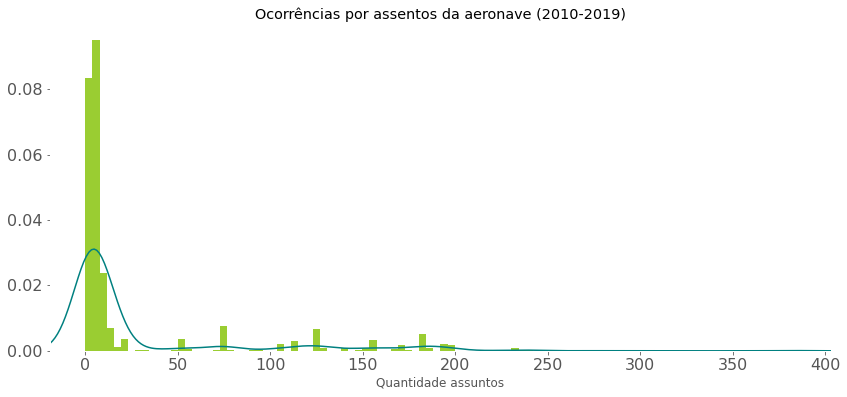

In [ ]:
aeronave_assentos = Counter(df_dados['aeronave_assentos'])
fase_aeronave_assentos = sorted(aeronave_assentos, key = aeronave_assentos.get, reverse = True)
contador_aeronave_assentos = sorted(list(aeronave_assentos.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(14, 6))
ax.set_facecolor('white')

x= df_dados.aeronave_assentos
plt.hist(x, density=True, color='#9ACD32', bins= 100)
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF", color='#008080')
plt.xlabel('Quantidade assuntos')
plt.title('Ocorrências por assentos da aeronave (2010-2019)')

plt.show()

De acordo com o gráfico acima, percebemos que a quantia por aeronave com ocorrências com maior frequência nesse período de tempo foi de **6** ocorrências por assentos, que representa **16,84%** do total.

A **média** de ocorrências por quantidade de assentos ficou em **60,25** neste período, em razão a quantidade de aeronaves com elevado número de assentos.

# Aeronaves envolvidas

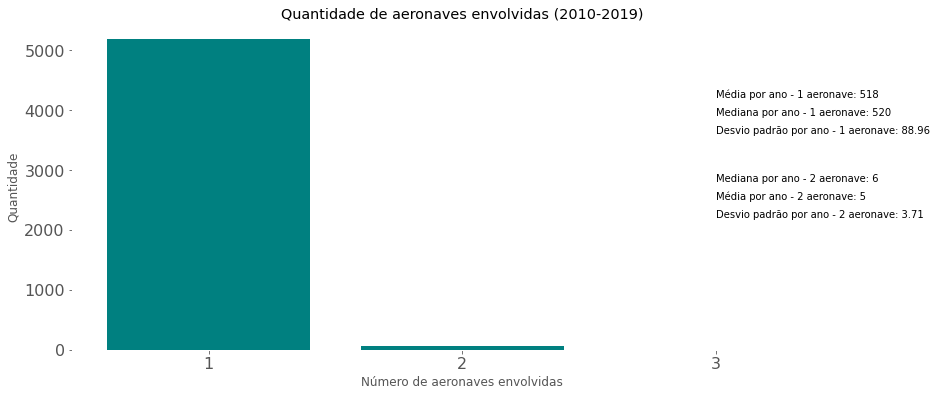

In [ ]:
#ocorrência por ano e por aeronaves envolvidas = 1
aeronave_uma = list(set(df_dados['ano']))
todas_aeronave_uma= list(df_dados.loc[(df_dados['aeronaves_envolvidas']) == 1, ['ano']]
                         ['ano'])
qtd_aeronave_uma_ano = pd.DataFrame({'ano': aeronave_uma, 'aeronave': [todas_aeronave_uma.count(i) for i in aeronave_uma]})
qtd_aeronave_uma_ano = qtd_aeronave_uma_ano.sort_values(['aeronave'])
total_qtd_aeronave_uma_ano= qtd_aeronave_uma_ano['aeronave'].sum()

#ocorrência por ano e por aeronaves envolvidas = 2
aeronave_duas = list(set(df_dados['ano']))
todas_aeronave_duas= list(df_dados.loc[(df_dados['aeronaves_envolvidas']) == 2, ['ano']]
                         ['ano'])
qtd_aeronave_duas_ano = pd.DataFrame({'ano': aeronave_duas, 'aeronave': [todas_aeronave_duas.count(i) for i in aeronave_duas]})
qtd_aeronave_duas_ano = qtd_aeronave_duas_ano.sort_values(['aeronave'])
total_qtd_aeronave_duas_ano= qtd_aeronave_duas_ano['aeronave'].sum()

aeronaves_envolvidas = Counter(df_dados['aeronaves_envolvidas'])
fase_aeronaves_envolvidas = sorted(aeronaves_envolvidas, key = aeronaves_envolvidas.get, reverse = True)
contador_aeronaves_envolvidas = sorted(list(aeronaves_envolvidas.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(14, 6))

x=fase_aeronaves_envolvidas
y=contador_aeronaves_envolvidas

rects1=ax.bar(x, y,color='#008080')
ax.set_xticks(x)
ax.set_facecolor('white')
plt.ylabel("Quantidade")
plt.xlabel("Número de aeronaves envolvidas")
plt.title('Quantidade de aeronaves envolvidas (2010-2019)')
plt.text(3, 4209.9, 'Média por ano - 1 aeronave: %d'%(np.mean(np.array(qtd_aeronave_uma_ano['aeronave']))))
plt.text(3, 3909.9, 'Mediana por ano - 1 aeronave: %d'%(np.median(np.array(qtd_aeronave_uma_ano['aeronave']))))  
plt.text(3, 3609.7, 'Desvio padrão por ano - 1 aeronave: %.2f'%(static.stdev(qtd_aeronave_uma_ano['aeronave'])))

plt.text(3, 2809.9, 'Mediana por ano - 2 aeronave: %d'%(np.median(np.array(qtd_aeronave_duas_ano['aeronave']))))  
plt.text(3, 2509.9, 'Média por ano - 2 aeronave: %d'%(np.mean(np.array(qtd_aeronave_duas_ano['aeronave']))))
plt.text(3, 2209.7, 'Desvio padrão por ano - 2 aeronave: %.2f'%(static.stdev(qtd_aeronave_duas_ano['aeronave'])))

plt.show()

Ao observamos o gráfico acima, notamos que a maior parte das ocorrências (**5182**) teve o envolvimento de apenas **1** aeronave, totalizando **98,85%** do total de liberações, que ocorre devido aos processos de segurança envolvidos, que anulam as chances de ocorrências com mais de 1 aeronave.

Pode-se inferir que as ocorrências em voo ou envolve situações onde o fato(ocorrência) acontece a bordo ou por agentes externos (ex: colisão com aves)

**Média** de ocorrências **1** aeronave = **520** por ano.

**Média** de ocorrências **2** aeronave = **5** por ano.



# Horário da Ocorrência

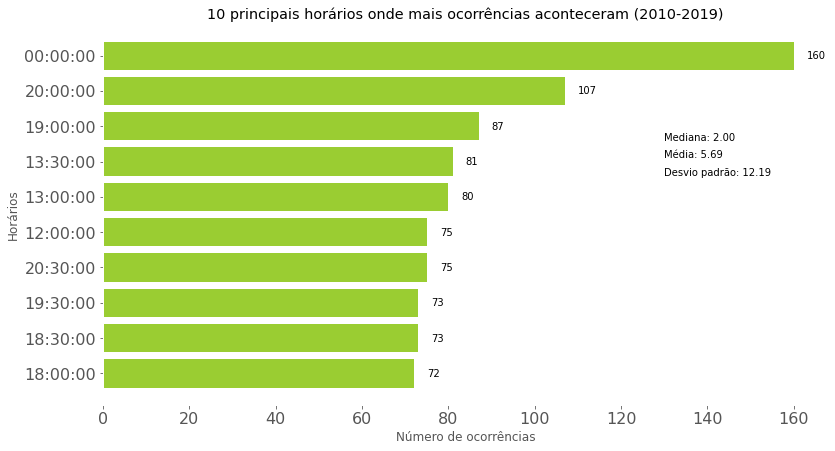

In [ ]:
hora = Counter(df_dados['hora'])
fase_hora = sorted(hora, key = hora.get, reverse = True)
contador_hora = sorted(list(hora.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=fase_hora[:10]
y=contador_hora[:10]

ax.barh(x, y, color='#9ACD32')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
ax.set_facecolor('white')

plt.xlabel('Número de ocorrências')
plt.ylabel('Horários')
plt.title('10 principais horários onde mais ocorrências aconteceram (2010-2019)')

plt.text(130, 2.4, 'Mediana: %.2f'%(np.median(np.array(contador_hora))))
plt.text(130, 2.9, 'Média: %.2f'%(np.mean(np.array(contador_hora))))
plt.text(130, 3.4, 'Desvio padrão: %.2f'%(static.stdev(contador_hora)))

plt.show()

Percebe-se que o horário com mais ocorrências (**160**) foi: **00:00** (Meia-Noite).

A **média** de ocorrências por horário foi documentada com **5,69**.

A quantia dos 10 horários com mais ocorrências representa **16,84%** do total  representado no gráfico acima.

Entende-se que, a quantia de ocorrências em períodos noturnos, está atrelada ao tipo de ocorrência, tendo em mente que, temos altos niveis ocorrências em pouso.


# Quebra de dados em conjunto de treino e conjunto de teste


In [ ]:
from sklearn.model_selection import train_test_split

df_dados['tipo'] = df_dados['tipo'].replace('INCIDENTE', 0)
df_dados['tipo'] = df_dados['tipo'].replace('INCIDENTE GRAVE', 1)
df_dados['tipo'] = df_dados['tipo'].replace('ACIDENTE', 2)

df_dados['aeronave_liberada'] = df_dados['aeronave_liberada'].replace('INDETERMINADO', 0)
df_dados['aeronave_liberada'] = df_dados['aeronave_liberada'].replace('SIM', 1)
df_dados['aeronave_liberada'] = df_dados['aeronave_liberada'].replace('NÃO', 2)

df_dados['status_investigacao'] = df_dados['status_investigacao'].replace('INDETERMINADA', 0)
df_dados['status_investigacao'] = df_dados['status_investigacao'].replace('FINALIZADA', 1)
df_dados['status_investigacao'] = df_dados['status_investigacao'].replace('ATIVA', 2)

df_dados['aeronave_nivel_dano'] = df_dados['aeronave_nivel_dano'].replace('NENHUM', 0)
df_dados['aeronave_nivel_dano'] = df_dados['aeronave_nivel_dano'].replace('LEVE', 1)
df_dados['aeronave_nivel_dano'] = df_dados['aeronave_nivel_dano'].replace('SUBSTANCIAL', 2)
df_dados['aeronave_nivel_dano'] = df_dados['aeronave_nivel_dano'].replace('DESTRUÍDA', 3)
df_dados['aeronave_nivel_dano'] = df_dados['aeronave_nivel_dano'].replace('INDETERMINADO', 4)

df_dados['ocorrencia_saida_pista'] = df_dados['ocorrencia_saida_pista'].replace('NÃO', 0)
df_dados['ocorrencia_saida_pista'] = df_dados['ocorrencia_saida_pista'].replace('SIM', 1)


y = df_dados['aeronave_assentos']
x = df_dados.drop(['aeronave_assentos', "descricao","cidade", "estado", "hora",
                 "aeronave_tipo", "aeronave_pais_fabricante", "aeronave_fase_operacao",
                 "data", "aeronave_fabricante", 
                "aeronave_motor_quantidade", "motor_tipo"], axis = 1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)
print(df_dados.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)


(5242, 23) (3669, 11) (1573, 11) (3669,) (1573,)


#Verifica o desempenho do estimador do scikit-learn no conjunto de teste


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = logreg_model.predict(x_teste)

print(f"Acurácia de Teste: ±{mean_absolute_error(y_teste, y_pred):1.0f}")

Acurácia de Teste: ±34


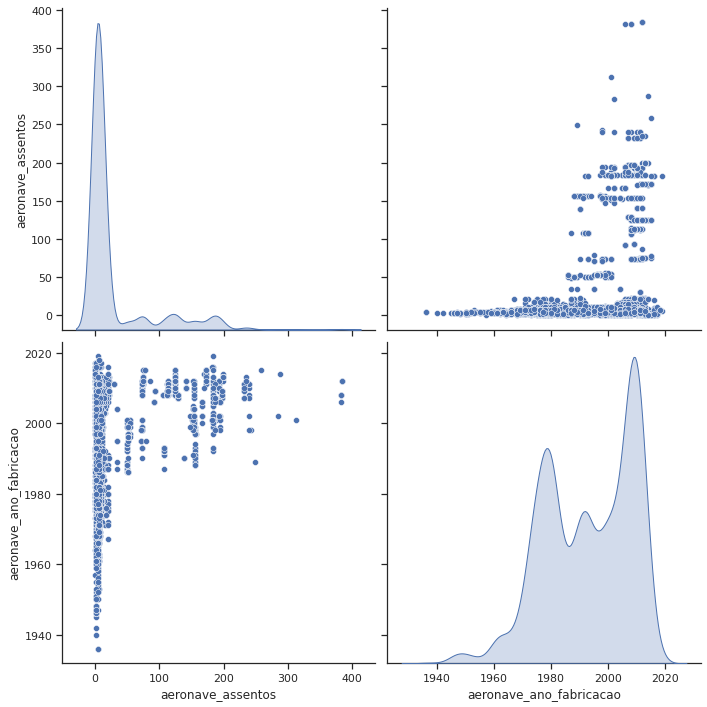

In [ ]:
df = df_dados.drop(df_dados.loc[df_dados['aeronave_ano_fabricacao']==0].index, inplace=True)
df = df_dados.drop(df_dados.loc[df_dados['aeronave_ano_fabricacao']==9999].index, inplace=True)

pair_col1 = ['aeronave_assentos', 'aeronave_ano_fabricacao']

sns.set_theme(style="ticks") # configuração

def pairplot(df, column_list):

    sns.pairplot(df_dados[column_list], kind='scatter', diag_kind='kde', height=5)
    plt.show()
    
pairplot(df, pair_col1)

In [ ]:
import statsmodels.api as sm

X = df_dados['aeronave_ano_fabricacao']
y = df_dados['aeronave_assentos']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      aeronave_assentos   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     726.7
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          2.33e-149
Time:                        22:20:43   Log-Likelihood:                -26136.
No. Observations:                4896   AIC:                         5.228e+04
Df Residuals:                    4894   BIC:                         5.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

# Regressão Linear - Número de assentos


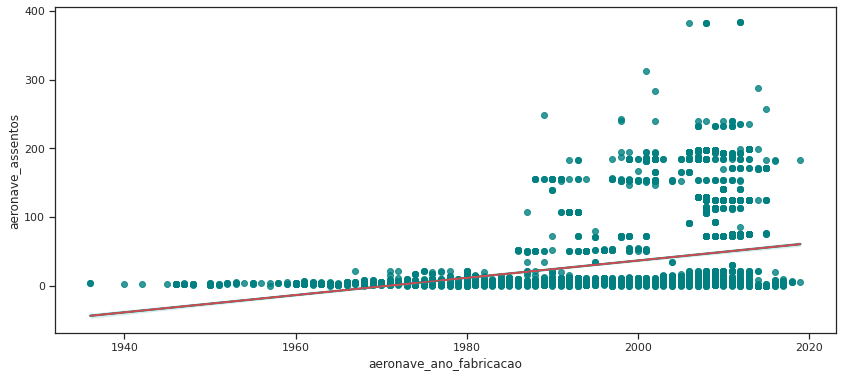

In [ ]:
# Criação do DataFrame
dataframe = pd.DataFrame()
dataframe['x'] = df_dados['aeronave_ano_fabricacao']
dataframe['y'] = df_dados['aeronave_assentos']
x_values = dataframe[['x']]
y_values = dataframe[['y']]

# plotando o gráfico da regressão

plt.figure(figsize=(14,6)) 
sns.regplot(x='aeronave_ano_fabricacao', y='aeronave_assentos', data=df_dados, color='#008080')

# traçando a linha da regressão
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)
# plotando um gráfico em cima do outro
plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')
plt.show()

O gráfico acima demarca o eixo X com os anos de fabricação de aeronaves envolvidas em algum tipo de ocorrência aérea, já o eixo Y do gráfico representa a quantia de assentos das mesmas. Percebe-se do aumento nos números de assentos das aeronaves ao passar dos anos, principalmente pós-Segunda Guerra Mundial (1939-1945), já que tornaram-se um veículo em sua maioria cívil, descontinuando o uso militar.

É de se notar ao analisarmos o gráfico do aumento das ocorrencias, verificando a linha em vermelho. Levando em conta a fabricação das aeronaves aumentando - em média 743 voos diários (**MERCADOEEVENTOS**, 2020) - e um maior número de passageiros - em 2018, foram 100,87 milhões de pessoas (**AGENCIAEBC**, 2018) - as ocorrências serão mais constantes.

Nota-se também a alta de casos em aviões menores (com menos de 31 assentos - (**ANAC**, 2019)),  o que podemos considerar que os protocolos de segurança são falhos para este tipo de aeronave (**BBC**, 2021).








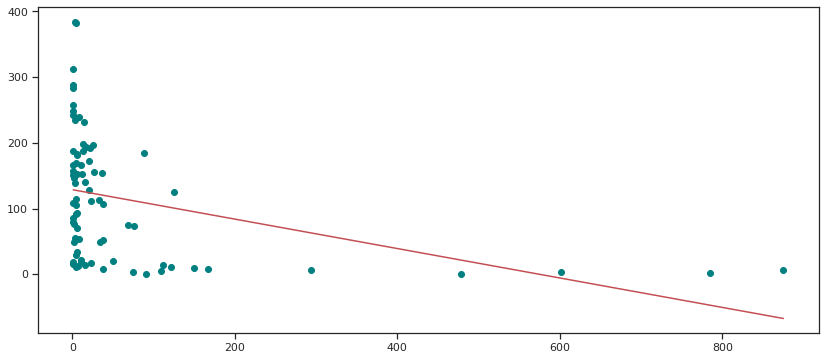

In [ ]:
aeronave_assentos = Counter(df_dados['aeronave_assentos'])
fase_aeronave_assentos = sorted(aeronave_assentos, key = aeronave_assentos.get, reverse = True)
contador_aeronave_assentos = sorted(list(aeronave_assentos.values()), reverse = True)

# Criação do DataFrame
dataframe = pd.DataFrame()
dataframe['y'] = fase_aeronave_assentos
dataframe['x'] = contador_aeronave_assentos
x_values = dataframe[['x']]
y_values = dataframe[['y']]

# plotando o gráfico da regressão

plt.figure(figsize=(14,6))
plt.scatter(dataframe['x'].values, dataframe['y'].values, color='#008080')

# traçando a linha da regressão
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)

# plotando um gráfico em cima do outro
plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')
plt.show()

Observando acima, percebemos o eixo X do gráfico como a quantia de acidentes aéreos em território brasileiro, o eixo Y representa a quantia de assentos. Nota-se que o quantidade de assentos foi diminuindo em medida da quantidade ocorrências acidentais. 

Em análise aos pontos que se referem aos acidentes aéreos, nota-se que menor for a quantidade de assentos, há também um aumento na quantidade de acidentes, levando a crer na necessidade de reavaliação dos protocolos de segurança de aeronaves com grande e pequena quantidade de assentos. Acompanhar e ter um maior controle sobre as regras e leis para aeronaves é fator crucial para melhoria nos dados do gráfico acima (**BBC**, 2021). 

O gráfico apresenta que de 150 casos, passaram a ser 800 os casos de acidentes referente aos assentos, ocasionando uma melhoria.




# Considerações Finais 

De forma clara e sucinta, o foco principal deste trabalho acadêmico é de realizar o levantamento e análise dos dados correspondentes a acidentes aéreos que ocorreram no território brasileiro, entre o período de ano de 2010 a 2019, visando assim a apresentação de forma gráfica das informações prestadas no base de dados fornecido em relação a aviação nacional.

Os dados contidos na base de dados referida foram usados neste documento e também está disponível no GitHub.

O foco da análise foi em ocorrências por região, tipo de aeronave, principais ocorrências e ocorrências por fabricante, entre demais tipos.

Os resultados obtidos como predominantes foram os seguintes:

* Entre as diversas aeronaves citadas, os aviões foram as mais afetadas ocasionando 4.213 mil ocorrências de acidentes. Destaca-se na análise aeronaves com até 6 acentos, monomotores datados de 2008.
 
*  Falhas relevantes apontadas foram principalmente os pistões do motor que representam uma porcentagem de 56,31% dos problemas citados. A fabricante de aeronaves Cessna Aircraft foi responsável por um total de 800 casos, sendo 23,51% do total de ocorrências. 

* Acidentes em sua grande parte são de pequena proporção correspondendo a 55,1% do total, sendo o mês de janeiro o com mais incidentes no ano. No Sudeste, a análise nos mostra que ocorrências são fequentes, e que o estado de São Paulo é o mais afetado.


# Relatório Final


Este trabalho acadêmico visou ilustrar todo o amplo aspecto de informações que envolvem ocorrências acidentais da aviação brasileira entre os anos de 2010 a 2019 com certos tipos de aeronave. É vital a consideração de compreender que todo o conteúdo citado neste documento atentou-se aos dados coletados e produzidos pelo CENIPA, como fonte vital de base de dados, e assim evitando ao máximo a análise de dados terceiros.

O objetivo deste, é o compartilhamento de ocorrências de aeronaves de asa fixa sejam detalhadas e ilustradas assim sendo material de estudo para pesquisas e ajuda a prevenção de acidentes aeronáuticos futuros.
 

Os dados coletados , após análise, é constado que incidentes são de números e aeronaves diversificadas sem descriminação no ocorrido.

Na filtragem e tratamento de dados, podemos notar que a maioria dos casos ocorrem devido a fatores externos e que em grande parte , tiveram poucos danos a aeronave ou até mesmo quase nenhum.
Assim sendo, as investigações sobre estas ocorrências, o maior número registrado pelo CENIPA no ano de 2013 e o menor em 2016.

Se tratando de incidentes envolvendo aeronaves, todos envolvidos são mobilizados e também necessários para que a investigação ocorra seguindo os protocolos e regras pré-estabelecidos. Com a análise final é possivel afirmar que os voos são seguros de forma geral.

Por fim conseguimos estabelecer algumas peculiaridades nas ocorrências fornecidas: o que causou incidente/incidente grave/acidente, a média de incidentes por ano, cidade, horários, tipos de aeronaves e o nível de dano causado. A ocorrência que mais tem como principal a falha do motor durante o voo, em contra-partida a colisão com objetos durante a decolagem e o pouso que apresentaram a menor porcentagem de dados.

Com tudo isso análisado, conclui-se que os números de incidentes são de menor quantia, comparado ao número de aeronaves que realizam decolagem todos os dias durante o ano, porém não são de todavia nulos os ocorridos. 



# Referências Bibliográficas

CENIPA, **FCA 58-1 Ocorrências Aeronáuticas**: Panorama Estatístico da Aviação Brasileira. 118p. Centro de Investigações 
e Prevenção de Acidentes Aeronáuticos. 2016. 
 
CAMARA, Gilberto; ASSIS, Luiz F.; QUEIROZ, Gilberto R.;FERREIRA, Karine R.; LLAPA, Eduardo; VINHAS, Lubia. **Big 
earth observation data analytics: matching requirements to system architectures**. Proceedings of the 5th ACM 
SIGSPATIAL International Workshop on Analytics for Big Geospatial Data. 2016. 

CHOUDHARY, Jayvant; OHRI, Anurag; KUMAR, Brind. **Identification of Road Accidents Hot Spots in Varanasi using 
QGIS**. Proceedings of National Conference on Open Source GIS: Opportunities and Challenges Department of Civil Engineering, IIT(BHU), 2015. 

EMC. **Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data.** Wiley, EMC Education Services, 1st Edition, 2015, 399 p.

GRUS, Joel. **Data Science from Scratch: First Principles with Python.** O'Reilly Media, Inc., 1st ed., 2015, 330 p.

WAGNER, Michael; LLORT, Gérman; MERCADAL, Estanislao;GIMÉNEZ, Judit; LABARTA, Jesús. **Performance Analysis 
of Parallel Python Applications.** Proceeding of International Conference on Computational Science, ICCS. 2017.

Bruna Mulinari. **Pandas Python: vantagens e como começar**. Harve ,[S.I.],[?].Disponível em: http://harve.com.br/blog/programacao-python-blog/pandas-python-vantagens-e-como-comecar. Acesso em: 2 de maio de 2022.

Anselmo R. Pitombeira Neto. **Introdução ao NumPy**. Universidade Federal do Ceará, [S.I.], [?].Disponível em: http://www.opl.ufc.br/post/numpy/Tutorial_numpy.pdf Acesso em: 2 de maio 2022.

UFPR. **4. SciPy**. [S.I.]. [?]. Disponível em: http://www.estruturas.ufpr.br/disciplinas/pos-graduacao/introducao-a-computacao-cientifica-com-python/introducao-python/capitulo-4-scipy. Acesso em: 2 de maio de 2022

Brad Solomon. **Python Plotting With Matplotlib (Guide)**. Real Python, [S.I.], 2019.Disponível em: https://realpython.com/python-matplotlib-guide/. Acesso em: 2 de maio de 2022

AnaliseMacro. **Python: Visualizando dados com Matplotlib e Seaborn**. [S.I.],[?].Disponível em: https://analisemacro.com.br/data-science/python/python-visualizando-dados-com-matplotlib-e-seaborn/. Acesso em: 2 de maio de 2022

PYTHON. **Collections — Tipos de dados do contêiner**. [S.I.], [?] ,Disponível em:
https://docs.python.org/3/library/collections.html. Acesso em: 2 de maio de 2022. 

ANAC. **REGULAMENTO BRASILEIRO DA 
AVIAÇÃO CIVIL**. [S.I.], 2019 .Disponível em:
https://www.anac.gov.br/assuntos/legislacao/legislacao-1/rbha-e-rbac/rbac/rbac-01/@@display-file/arquivo_norma/RBAC01EMD08.pdf .16 p . Acesso em: 2 de maio. 2021